# MVP: Qualidade de Fornecimento Energia no Brasil

### Sprint I: Análise de Dados e Boas Práticas

### Autor: Wellington Bastos, MSc

### Professores:
> - Profa. Dra. Tatiana Escovedo
> - Profa. Dra. Simone Diniz Junqueira Barbosa
> - Prof. Dr. Marcos Kalinowski


## Escopo:
Gerar uma visão da qualidade de energia elétrica, entregue pelas distribuidoras, no Brasil a partir de dados oficiais divulgados pela  Agência Nacional de Energia Elétrica - Aneel - ao longo da última década.  A visão deverá poder ser estratificada por UF, Município, Conjunto de Distribuição e por Concessionária de Energia. O resultado da análise deverá subsidiar uma empresa de telecomunicações, do mercado nacional, na avaliação da disponibilidade do serviço de suas estações rádio base, gerar insigths para o  dimensionamento dos sistemas de backups e permitir redirecionamento de Capex e Opex. Em um segundo momento, os dados gerados deverão ser enriquecidos com as informações geográficas das subestações de energia e estações rádio base para que a análise possa ser individualizada ou em agrupamentos. Também é desejável reconhecer padrões de sazonalidades e realizar predições de frequência ou tempo de interrupção do serviço a partir dos dados históricos.

O MVP inicialmente irá realizar uma análise descritiva e diagnóstica dos dados obtidos na Aneel fornecendo uma visão analítica da qualidade de energia no Brasil, em suas UFs e Municípios, bem como das distrubuidoras. Na evolução do MVP, em um segundo momento, serão utilizados modelo de ML não supervisionados para gerar agrupamentos, a partir da posição geográfica, entre o conjunto de medição de energia e as estações rádio base, além de modelos supervisionados para realizar predições de frequência e duração de falhas de energia a partir de dados históricos.  

## Premissas: 

O MVP em sua primeira versão fará a análise descritiva e estáticas dos dados, portanto, não será aplicado nenhuma técnica de ML para classificação ou predição; 

- A análise tem objetivo acadêmico, portanto, seus resultados podem divergir de outras avaliações realizadas pela própria agência ou distribuidoras; 

- A analises serão feitas para períodos contínuos de medição e conjuntos ativos na data de coleta dos dados; 

- Serão considerados os dados de medição das concessionárias atuais para um dados conjunto de medição; 

- Serão considerados apenas os conjuntos com pelo menos 12 amostras (pelo menos YtD) 


## Restrições e Condições: 

- Nessa fase serão utilizados apenas dados públicos disponibilizados pela Aneel; 

- O dados de localidades, UF e Geolocalização foram obtidos utilizando o Google Maps a partir dos nomes dos conjuntos de distribuição.; 

- Foi assumido que os conjuntos de distribuição corresponde a uma subestação de energia da concessionaria; 

- Dos conjuntos de distribuição: 
> 1. Para municípios com mais de um conjunto será considerada a média dos conjuntos; 
> 1. Os municípios sem conjunto indicado não serão considerados nesse MVP, em um segundo momento esses poderão ser agrupados por proximidade geográfica a conjuntos existentes; 
- Os dados geográficos das estações rádio base das operadoras de Telecominicações não serão incorporadas ao estudo nessa fase do MVP; 

## Dataset
O Dataset a ser utilizado é formado pelos seguintes arquivos e atributos: 

 __Arquivo__: Indicadores – continuidade – coletivo – 2020-2029 
 
| Nome do Campo | Tipo do Dado | Descrição | Tamanho do Campo |
| :--- | :--- | :--- | :---: |
| DatGeracaoConjuntoDados | Data Simples | Data do processamento de carga automática no momento da geração para publicação do conjunto de dados abertos  |  |
| SigAgente | Cadeia de caracteres | Sigla que abrevia o nome dos Agentes regulados pela ANEEL  | 20 |
| NumCNPJ  | Cadeia de caracteres | CNPJ do Agente do setor elétrico conforme cadastro de agentes da ANEEL | 14 |
| IdeConjUndConsumidoras  | Cadeia de caracteres | Identificador do Conjunto de Unidades Consumidoras.  | 5 |
| DscConjUndConsumidoras  | Cadeia de caracteres | Descrição do Conjunto de Unidades Consumidoras | 255 |
| SigIndicador  | Cadeia de caracteres | Sigla do Tipo de Indicador. As siglas e descrições completas das mesmas estão disponibilizadas em um arquivo à parte devido a volumetria que esses dados gerariam. Vide o arquivo dominio-indicadores.csv disponibilizado na mesma página desse conjunto de dados. | 3 |
| AnoIndice   | Cadeia de caracteres | Ano de competência do índice | 4 |
| NumPeriodoIndice | Numérico | Período do índice expressado em meses | 4 |
|  VlrIndiceEnviado | Numérico | Valor do índice enviado | 18.8 |

__Arquivo__:indicadores-continuidade-coletivos-limite 

| Nome do Campo | Tipo do Dado | Descrição | Tamanho do Campo |
| :--- | :--- | :--- | :---: |
| DatGeracaoConjuntoDados | Data Simples | Data do processamento de carga automática no momento da geração para publicação do conjunto de dados abertos  |  |
| SigAgente | Cadeia de caracteres | Sigla que abrevia o nome dos Agentes regulados pela ANEEL  | 20 |
| NumCNPJ  | Cadeia de caracteres | CNPJ do Agente do setor elétrico conforme cadastro de agentes da ANEEL | 14 |
| IdeConjUndConsumidoras  | Cadeia de caracteres | Identificador do Conjunto de Unidades Consumidoras.  | 5 |
| DscConjUndConsumidoras  | Cadeia de caracteres | Descrição do Conjunto de Unidades Consumidoras | 255 |
| SigIndicador  | Cadeia de caracteres | Sigla do Tipo de Indicador. As siglas e descrições completas das mesmas estão disponibilizadas em um arquivo à parte devido a volumetria que esses dados gerariam. Vide o arquivo dominio-indicadores.csv disponibilizado na mesma página desse conjunto de dados. | 3 |
| AnoLimiteQualidade   | Cadeia de caracteres | Ano de competência do índice | 4 |
|  VlrLimite  | Numérico | Valor do índice enviado | 18.8 |


__Arquivo__: Lista Distribuidora x Municipios 

| Nome do Campo | Tipo do Dado | Descrição |
| :--- | :--- | :--- |
| Municipio | Cadeia de Caracteres | nome do município em que está localizado o conjunto de medição (Subestação) |
| Estado | Cadeia de Caracteres | Unidade da Federação  |
| Concessionario | Cadeia de Caracteres | Nome da concessionária de distribuição de energia |

Importante destacar que o atributo Sigindicator possui um algumas categorias, contudo para esse trabalho será considerado apenas as categorias DEC e FEC, que correspondem ao período acumulado de interrupção do serviço, em horas, acima de 3 minutos e a frequência de interrupção, respectivamente. 


# Análise Exploratória dos Dados

## Início do Código PY para tratar a base de dados lidas do site Aneel

As bases de dados podem ser obtidas no link indicado, podendo ser obtidas em vários formatos através de download ou uso de API. Optamos em fazer os downloads dos arquivos: 
> - indicadores-continuidade-coletivos-2020-2029.csv (https://dadosabertos.aneel.gov.br/dataset/indicadores-coletivos-de-continuidade-dec-e-fec/resource/4493985c-baea-429c-9df5-3030422c71d7)

> - indicadores-continuidade-coletivos-limite. csv (https://dadosabertos.aneel.gov.br/dataset/indicadores-coletivos-de-continuidade-dec-e-fec/resource/fd69e1dd-fd66-4269-b60c-cc0b7eb221b4)

Também é possível obter os dicionários de dados a partir dos links acima.

Na sequencia de código são executadas as seguintes ações:
> 1. Carga das bibliotecas Pandas e Numpy para uso no tratamento dos dados;
> 1. Leitura dos arquivos csv e verificação do tamanho e primeiras linhas do arquivo de indicadores coletivos de continuidade. O arquivo de limites deverá ser inspecionado mais a frente no código.

In [859]:
# Carregando as Bibliotecas 
import pandas as pd
import numpy as np


# Lendo o arquivo Indicadores de continuidade coletivo – 2020-2023
url='https://raw.githubusercontent.com/wabastos/AnaliseExploratoria/main/indicadores_continuidade_coletivo_2020-2023.csv'
ind_coletivo = pd.read_csv(url)

# Lendo o arquivo com os limites para os indicadores de continuidade coletivos
url='https://raw.githubusercontent.com/wabastos/AnaliseExploratoria/main/indicadores_continuidade_coletivos_limite.csv'
ind_limite = pd.read_csv(url)

# Verificando a quantidade de registros do arquivo
linhas, colunas = ind_coletivo.shape
print('Quantidade de linhas do dataframe de Indicadores de continuidade:',"{:,}".format(linhas).replace(",", "."))
print('Quantidade de colunas do dataframe de Indicadores de continuidade:',colunas)

# Verificando a quantidade de registros do arquivo
linhas, colunas = ind_limite.shape
print('\nQuantidade de linhas do dataframe de Limites indicadores de continuidade:',"{:,}".format(linhas).replace(",", "."))
print('Quantidade de colunas do dataframe de Limites indicadores de continuidade:',colunas)

ind_coletivo.head(100)


Quantidade de linhas do dataframe de Indicadores de continuidade: 231.264
Quantidade de colunas do dataframe de Indicadores de continuidade: 10

Quantidade de linhas do dataframe de Limites indicadores de continuidade: 239.454
Quantidade de colunas do dataframe de Limites indicadores de continuidade: 9


,_id,DatGeracaoConjuntoDados,SigAgente,NumCNPJ,IdeConjUndConsumidoras,DscConjUndConsumidoras,SigIndicador,AnoIndice,NumPeriodoIndice,VlrIndiceEnviado
0,3596,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,10,",21"
1,3597,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,11,"1,13"
2,3598,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,5,",21"
3,3599,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,12,",61"
4,3600,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,7,",12"
...,...,...,...,...,...,...,...,...,...,...
95,4065,2023-03-27,Equatorial PI,6840748000189,12686,PIRIPIRI,DEC,2020,6,",79"
96,4066,2023-03-27,Equatorial PI,6840748000189,12686,PIRIPIRI,DEC,2020,3,"5,55"
97,4067,2023-03-27,Equatorial PI,6840748000189,12686,PIRIPIRI,DEC,2020,4,"2,49"
98,4068,2023-03-27,Equatorial PI,6840748000189,12686,PIRIPIRI,DEC,2020,1,"5,82"


### Eliminação de registros desnecessários

__Ações executadas__:

> 1. Para esse MVP são necessários apenas os dados de FEC e DEC rotulados no atributo - *SigIndicator* - do Dataframe de indicador coletivo (ind_coletivo). A ação irá gerar um novo dataframe (ind_coletivo_FD) com menos instâncias. As 100 primeiras linhas são inspecionadas;
> 1. Na sequência são inspecionados alguns registros com filtro FEC e filtro DEC;
> 1. Também são avaliado o tamanho do dataframe e seus tipos de dados.

In [860]:
# Filtrando o arquivos de indicadores de continuidade por DEC e FEC
ind_coletivo_FD = ind_coletivo.loc[(ind_coletivo['SigIndicador']=='DEC')| (ind_coletivo['SigIndicador']=='FEC' )]

# exibindo as primeiras linhas do arquivo de indicadores coletivo filtrado por FEC e DEC
ind_coletivo_FD.head(100)

,_id,DatGeracaoConjuntoDados,SigAgente,NumCNPJ,IdeConjUndConsumidoras,DscConjUndConsumidoras,SigIndicador,AnoIndice,NumPeriodoIndice,VlrIndiceEnviado
0,3596,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,10,",21"
1,3597,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,11,"1,13"
2,3598,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,5,",21"
3,3599,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,12,",61"
4,3600,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,7,",12"
...,...,...,...,...,...,...,...,...,...,...
95,4065,2023-03-27,Equatorial PI,6840748000189,12686,PIRIPIRI,DEC,2020,6,",79"
96,4066,2023-03-27,Equatorial PI,6840748000189,12686,PIRIPIRI,DEC,2020,3,"5,55"
97,4067,2023-03-27,Equatorial PI,6840748000189,12686,PIRIPIRI,DEC,2020,4,"2,49"
98,4068,2023-03-27,Equatorial PI,6840748000189,12686,PIRIPIRI,DEC,2020,1,"5,82"


In [861]:
# exibindo as primeiras linhas do arquivo de indicadores coletivo filtrado por FEC 
ind_coletivo_FD.loc[(ind_coletivo_FD['SigIndicador']=='FEC')].head()

,_id,DatGeracaoConjuntoDados,SigAgente,NumCNPJ,IdeConjUndConsumidoras,DscConjUndConsumidoras,SigIndicador,AnoIndice,NumPeriodoIndice,VlrIndiceEnviado
4721,15668,2023-03-27,EFLUL,86531175000140,5273,URUSSANGA,FEC,2020,3,"1,04"
4722,15669,2023-03-27,EFLUL,86531175000140,5273,URUSSANGA,FEC,2020,4,",09"
4723,15670,2023-03-27,EFLUL,86531175000140,5273,URUSSANGA,FEC,2020,12,",52"
4724,15671,2023-03-27,EFLUL,86531175000140,5273,URUSSANGA,FEC,2020,7,",15"
4725,15672,2023-03-27,EFLUL,86531175000140,5273,URUSSANGA,FEC,2020,9,",09"


In [862]:
# exibindo as primeiras linhas do arquivo de indicadores coletivo filtrado por DEC
ind_coletivo_FD.loc[(ind_coletivo['SigIndicador']=='DEC')].head()

,_id,DatGeracaoConjuntoDados,SigAgente,NumCNPJ,IdeConjUndConsumidoras,DscConjUndConsumidoras,SigIndicador,AnoIndice,NumPeriodoIndice,VlrIndiceEnviado
0,3596,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,10,",21"
1,3597,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,11,"1,13"
2,3598,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,5,",21"
3,3599,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,12,",61"
4,3600,2023-03-27,CERPALO,85318640000105,12479,CERPALO,DEC,2020,7,",12"


In [863]:
# Verificando a quantidade de registros do arquivo
print('Tamanho do arquivo filtrado (FEC, DEC) de indicadores de continuidade:',"{:,}".format(ind_coletivo_FD.size).replace(",", "."))

# Verificando os tipos de coluna do dataframe Indicadores Coletivos
ind_coletivo_FD.dtypes

Tamanho do arquivo filtrado (FEC, DEC) de indicadores de continuidade: 2.312.640


_id                         int64
DatGeracaoConjuntoDados    object
SigAgente                  object
NumCNPJ                     int64
IdeConjUndConsumidoras      int64
DscConjUndConsumidoras     object
SigIndicador               object
AnoIndice                   int64
NumPeriodoIndice            int64
VlrIndiceEnviado           object
dtype: object

### Eliminando atributos desnecessários

Nessa etapa do código é avaliado o arquivo de Limites dos indicadores de continuidade coletivos. Os Limites são os valores máximos de referência de qualidade para as categorias DEC (tempo acumulado de descontinuidade) e FEC (quantidade das falhas acumuladas). Portanto, nesse arquivo apenas essas categorias estão presentes nas instâncias. 
Já os atributos se diferencia do arquivo de Indicadores apenas pelo atributo "VlrLimite", logo serão eliminados os atributos desnecessários para uma composição de arquivo (join left).

__Ações executadas__:

> 1. Inspeção do arquivo (head e tail);
> 1. Verificação do tamanho do arquivo;
> 1. Renomear o atributo - *AnoLimiteQualidade* - para o nome equivalente do Dataframe ind_coletivo_FD;
> 1. Elimina os atributos desnecessários, ou seja, permanece apenas com os atributos necessários para o merge com o arquivo de indicadores;
> 1. Mostra as colunas e os tipos de dados remanescentes 

In [864]:
# Exibindo as últimas linhas do arquivo de limites dos indicadores coletivo filtrado por FEC 
ind_limite.head()

,_id,DatGeracaoConjuntoDados,SigAgente,NumCNPJ,IdeConjUndConsumidoras,DscConjUndConsumidoras,SigIndicador,AnoLimiteQualidade,VlrLimite
0,1,2023-03-27,CERON,5914650000166,9254,PIMENTA BUENO,DEC,2005,"87,00"
1,2,2023-03-27,CERON,5914650000166,9254,PIMENTA BUENO,FEC,2005,"85,00"
2,3,2023-03-27,CERON,5914650000166,9254,PIMENTA BUENO,DEC,2006,"70,00"
3,4,2023-03-27,CERON,5914650000166,9254,PIMENTA BUENO,FEC,2006,"70,00"
4,5,2023-03-27,CERON,5914650000166,9254,PIMENTA BUENO,DEC,2007,"70,00"


In [865]:
# Exibindo as últimas linhas do arquivo de limites dos indicadores coletivo filtrado por DEC 
ind_limite.tail()

,_id,DatGeracaoConjuntoDados,SigAgente,NumCNPJ,IdeConjUndConsumidoras,DscConjUndConsumidoras,SigIndicador,AnoLimiteQualidade,VlrLimite
239449,239450,2023-03-27,EMG,19527639000158,16935,Centenario,FEC,2026,"10,00"
239450,239451,2023-03-27,COOPERZEM,78829843000192,16613,COOPERZEM,DEC,2023,"16,00"
239451,239452,2023-03-27,COOPERZEM,78829843000192,16613,COOPERZEM,DEC,2024,"15,00"
239452,239453,2023-03-27,COOPERZEM,78829843000192,16613,COOPERZEM,DEC,2025,"14,00"
239453,239454,2023-03-27,COOPERZEM,78829843000192,16613,COOPERZEM,DEC,2026,"13,00"


In [866]:
# Verificando a quantidade de registros do arquivo
print('Tamanho do arquivo de limites dos indicadores de continuidade:',"{:,}".format(ind_limite.size).replace(",", "."))

# Troca o número da coluna AnoLimiteQualidade para o memos nome da coluna equivalente no Dataframe Indicadores
ind_limite.rename(columns={'AnoLimiteQualidade': 'AnoIndice'}, inplace=True)

# Remanesce com as colunas chaves as necessárias para o merge com o dataframe Indicadores
ind_limite = ind_limite.loc[:,['SigAgente','IdeConjUndConsumidoras', 
                            'SigIndicador','AnoIndice','VlrLimite']]

# Verificando os tipos de coluna do dataframe Limite dos Indicadores Coletivos
ind_limite.dtypes

Tamanho do arquivo de limites dos indicadores de continuidade: 2.155.086


SigAgente                 object
IdeConjUndConsumidoras     int64
SigIndicador              object
AnoIndice                  int64
VlrLimite                 object
dtype: object

### Merge dos Dataframes dos indicadores e seus limites

Nessa fase do código será criado um dataframe único a partir do cruzamento de dados dos dataframes ind_coletivo_FD e ind_limites. O objetivo é que seja incluido ao dataframe de indicadores a informação de seus limites conforme a classificação DEC e FEC.

__Ações executadas__:

> 1. Execução de um merge (left) usando como chave as informações de código único da concessionária - *SigAgente*", identificação do conjunto de medição - *IdeConjuUndConsumidoras*, indicador de qualidade DEC ou FEC - *SigIndicador* - e ano da medição ou do limite - *AnoIndice*;
> 1. Filtro para manter no dataframe resultante (df_ind_res) apenas os atributos necessários para o MVP;
> 1. Mostrar as 100 primeiras linhas do dataframe resultante;
> 1. Conversão dos dados de medição informados - *VlrIndiceEnviado* - e limites - *VlrLimite* - em valor numérico (float);
> 1. Verifica se a conversão foi bem sucedida.

In [867]:
df_ind_res = pd.merge(ind_coletivo_FD, ind_limite, 
                    on=['SigAgente','IdeConjUndConsumidoras', 'SigIndicador','AnoIndice'], how='left')[
                    ['SigAgente','DscConjUndConsumidoras', 
                    'SigIndicador','AnoIndice','VlrLimite','NumPeriodoIndice','VlrIndiceEnviado']]

In [868]:
df_ind_res.tail(100)

,SigAgente,DscConjUndConsumidoras,SigIndicador,AnoIndice,VlrLimite,NumPeriodoIndice,VlrIndiceEnviado
231164,EMG,SÃO MIGUEL DO ANTA,DEC,2023,"15,00",1,"1,46"
231165,Equatorial AL,UNIÃO DOS PALMARES,DEC,2023,"15,00",1,"1,70"
231166,EPB,BESSA,DEC,2023,"7,00",1,",29"
231167,AME,SANTO ANTÔNIO,DEC,2023,"66,00",1,"1,12"
231168,ETO,Pedro Afonso,DEC,2023,"40,00",1,"3,77"
...,...,...,...,...,...,...,...
231259,CERON,Vilhena,DEC,2023,"14,00",1,",75"
231260,CERON,Ariquemes,DEC,2023,"31,00",1,"2,17"
231261,CERBRANORTE,cerbranorte,DEC,2023,"10,00",2,",15"
231262,CERBRANORTE,cerbranorte,DEC,2023,"10,00",1,",37"


In [869]:
# Converte os campos string para valores numéricos
df_ind_res['VlrLimite'] = pd.to_numeric(df_ind_res['VlrLimite'].str.replace(',', '.'))
df_ind_res['VlrIndiceEnviado'] = pd.to_numeric(df_ind_res['VlrIndiceEnviado'].str.replace(',', '.')) 

In [870]:
df_ind_res.dtypes

SigAgente                  object
DscConjUndConsumidoras     object
SigIndicador               object
AnoIndice                   int64
VlrLimite                 float64
NumPeriodoIndice            int64
VlrIndiceEnviado          float64
dtype: object

### Trando os dados Nulos, Zeros e normalização de strings

Nessa etapa do código será verificado se existem dados que devam ser tratados ou normalizados. Particularmente para esse tipo de base de dados a preocupação deverá se concentrar em buscar dados nulos ou ausentes, zeros, e uniformidade de escrita para os campos que representam nomes.

__Ações executadas__:

> 1. Sumarizar por atributo o número de registros nulos;
> 1. Sumarizar por atributo o número de registros zeros;
> 1. Verificar quais atributos possuem dados nulos;
> 1. Eliminar os registros nulos (nesse caso serão removidas as instâncias do atributo *VirLimite*, uma vez que para esse MVP não interessam as medições que não são comparáveis aos seus limites de qualidade. Observa-se que os nulos ocorrem para alguns grupos de medições em todas as ocorrências nesses grupos, logo não são passíveis de inferência a partir de dados afins;
> 1. Mostrar sumarização após o drop das instâncias nulas;
> 1. Normalizar os atributos *SigAgente* e	*DscConjUndConsumidoras*, removendo diactricts e ativado upcase, para evitar que erros de escrita de um memos significado semãntico possam gerar resultados errados em agregações e exibições.

Os valores zeros observados no atributo *VlrIndiceEnviado* são dados úteis e correspondem a ausência de evento de descontinuidade de serviço, portanto devem ser preservados.

In [871]:
print('Registros Nulos:\n', df_ind_res.isnull().sum())
print('\nRegistros Zero:\n', df_ind_res.eq(0).sum())

Registros Nulos:
 SigAgente                    0
DscConjUndConsumidoras       0
SigIndicador                 0
AnoIndice                    0
VlrLimite                 1208
NumPeriodoIndice             0
VlrIndiceEnviado             0
dtype: int64

Registros Zero:
 SigAgente                   0
DscConjUndConsumidoras      0
SigIndicador                0
AnoIndice                   0
VlrLimite                   0
NumPeriodoIndice            0
VlrIndiceEnviado          868
dtype: int64


In [872]:
df_ind_res[df_ind_res['VlrLimite'].isnull()]
print(df_ind_res[df_ind_res['VlrLimite'].isnull()].groupby(['SigAgente','AnoIndice']).size())

SigAgente             AnoIndice
CASTRO - DIS          2020         24
                      2021         24
                      2022         24
CEGERO                2020         24
                      2021         24
                      2022         24
CELETRO               2022         24
                      2023          4
CEMIRIM               2021         24
                      2022         24
                      2023          2
CERAL ANITÁPOLIS      2020         24
                      2021         24
                      2022         24
                      2023          2
CERAL ARARUAMA        2020         24
                      2021         24
                      2022         24
CERAÇÁ                2020         24
                      2021         24
                      2022         24
                      2023          4
CERCI                 2020         24
                      2021         24
                      2022         24
CERFOX            

In [873]:
df_ind_res = df_ind_res.dropna(subset=['VlrLimite'])

In [874]:
print('Registros Nulos:\n', df_ind_res.isnull().sum())
print('\nRegistros Zero:\n', df_ind_res.eq(0).sum())

Registros Nulos:
 SigAgente                 0
DscConjUndConsumidoras    0
SigIndicador              0
AnoIndice                 0
VlrLimite                 0
NumPeriodoIndice          0
VlrIndiceEnviado          0
dtype: int64

Registros Zero:
 SigAgente                   0
DscConjUndConsumidoras      0
SigIndicador                0
AnoIndice                   0
VlrLimite                   0
NumPeriodoIndice            0
VlrIndiceEnviado          836
dtype: int64


In [875]:
import re

df_ind_res[['SigAgente', 'DscConjUndConsumidoras']] = df_ind_res[
    ['SigAgente', 'DscConjUndConsumidoras']].applymap(lambda x: re.sub('[^A-Za-z0-9]+', '', x))
df_ind_res[['SigAgente', 'DscConjUndConsumidoras']] = df_ind_res[['SigAgente', 'DscConjUndConsumidoras']].apply(lambda x: x.str.upper())
df_ind_res.head(100)

,SigAgente,DscConjUndConsumidoras,SigIndicador,AnoIndice,VlrLimite,NumPeriodoIndice,VlrIndiceEnviado
0,CERPALO,CERPALO,DEC,2020,13.0,10,0.21
1,CERPALO,CERPALO,DEC,2020,13.0,11,1.13
2,CERPALO,CERPALO,DEC,2020,13.0,5,0.21
3,CERPALO,CERPALO,DEC,2020,13.0,12,0.61
4,CERPALO,CERPALO,DEC,2020,13.0,7,0.12
...,...,...,...,...,...,...,...
95,EQUATORIALPI,PIRIPIRI,DEC,2020,18.0,6,0.79
96,EQUATORIALPI,PIRIPIRI,DEC,2020,18.0,3,5.55
97,EQUATORIALPI,PIRIPIRI,DEC,2020,18.0,4,2.49
98,EQUATORIALPI,PIRIPIRI,DEC,2020,18.0,1,5.82


### Complementando a base de dados com informações de localização

Nessa etapa do código os dados serão enriquecidos com informações de localização dos conjuntos de medição, que correspondem as subestações de energia elétrica da concessionária que abastecem determinado perímetro de consumidores. As localizações foram obtidas a partir do Google Maps em um processo específico que abasteceu o arquivo de endereço das subestações.

__Ações executadas__:

> 1. Leitura do arquivo de enderços dos conjuntos de medições;
> 1. Ajuste de nome de algumas variáveis para serem usadas como chave no processo de merge com o dataframe de indicadores;
> 1. Verificar o arquivo (primeiras linhas);
> 1. Realizar o merge inner entre o Dataframe resultante de indicadores e os dados de localização;
> 1. Salvar o arquivo resultante em formato csv;
> 1. Mostrar o tamanho e algumas linhas do dataframe de indicadores com localização;
> 1. Verificação da quantidade de registros únicos por atributo.


In [876]:
# Lendo o arquivo de Localização dos Conjuntos de Medição por Cidade, UF, Lat e Long
url='https://raw.githubusercontent.com/wabastos/AnaliseExploratoria/main/ENDERE%C3%87O_SUBESTA%C3%87%C3%95ES_TODOS_TRANSFORMADO.csv'
conjunto_local = pd.read_csv(url,sep=';')

# Troca o nome de colunas para o mesmos nomes nos df 
conjunto_local.rename(columns={'Distribuidora': 'SigAgente'}, inplace=True)
conjunto_local.rename(columns={'Conjunto': 'DscConjUndConsumidoras'}, inplace=True)

dicionario = {'RS':'Sul','SC':'Sul', 'PR':'Sul','SP':'Sudeste','RJ':'Sudeste','ES':'Sudeste','MG':'Sudeste','MT':'Centro Oeste',
             'MS':'Centro Oeste','DF':'Centro Oeste','TO':'Centro Oeste','GO':'Centro Oeste',
             'BA':'Nordeste','SE':'Nordeste','AL':'Nordeste','PE':'Nordeste','PB':'Nordeste','RN':'Nordeste','CE':'Nordeste',
             'PI':'Nordeste','MA':'Nordeste','PA':'Norte','RO':'Norte','AC':'Norte','AM':'Norte','AP':'Norte','RR':'Norte'}

conjunto_local.insert(loc=6, column='Regiao', value='')
conjunto_local['Regiao'] = conjunto_local['Estado'].map(dicionario)

# Tamanho do df 
print("Dimensão da base de dados: ",conjunto_local.shape)

conjunto_local.head(100)



Dimensão da base de dados:  (3115, 9)


,SigAgente,DscConjUndConsumidoras,Municipio,Estado,MUNICÍPIO_R,Endereco,Regiao,LAT_SUB,LONG_SUB
0,LIGHT,AGUA GRANDE AEREO,RIO DE JANEIRO,RJ,RIO DE JANEIRO,LIGHT SUBESTACAO AGUA GRANDE AEREO,Sudeste,"-22,8285735","-43,3137045"
1,LIGHT,ALDEIA CAMPISTA,RIO DE JANEIRO,RJ,RIO DE JANEIRO,LIGHT SUBESTACAO ALDEIA CAMPISTA,Sudeste,"-22,9173967","-43,2383761"
2,LIGHT,ALVORADA,RIO DE JANEIRO,RJ,RIO DE JANEIRO,LIGHT SUBESTACAO ALVORADA,Sudeste,"-22,9945514","-43,3774027"
3,LIGHT,ARI FRANCO,RIO DE JANEIRO,RJ,RIO DE JANEIRO,LIGHT SUBESTACAO ARI FRANCO,Sudeste,"-22,8615394","-43,4726912"
4,LIGHT,BAEPENDI AEREO,RIO DE JANEIRO,RJ,RIO DE JANEIRO,LIGHT SUBESTACAO BAEPENDI AEREO,Sudeste,"-22,9331398","-43,1810004"
...,...,...,...,...,...,...,...,...,...
95,CEBDIS,CEILANDIA SUL,BRASILIA,DF,BRASILIA,CEBDIS SUBESTACAO CEILANDIA SUL,Centro Oeste,"-15,8391623","-48,0940843"
96,CEBDIS,CONTAGEM,BRASILIA,DF,BRASILIA,CEBDIS SUBESTACAO CONTAGEM,Centro Oeste,"-15,889602","-48,1292712"
97,CEBDIS,GAMA,BRASILIA,DF,BRASILIA,CEBDIS SUBESTACAO GAMA,Centro Oeste,"-16,0162594","-48,0640718"
98,CEBDIS,HIPICA,BRASILIA,DF,BRASILIA,CEBDIS SUBESTACAO HIPICA,Centro Oeste,"-15,8407664","-47,9431668"


In [877]:
# realiza a junção (merge) entre os df de indicadores resultante e os dados de localiza dos conjuntos
df_ind_w_local = pd.merge(df_ind_res,conjunto_local,
                    on=['SigAgente','DscConjUndConsumidoras'], how='inner')[
                    ['SigAgente','DscConjUndConsumidoras','SigIndicador','AnoIndice','VlrLimite',
                     'NumPeriodoIndice', 'VlrIndiceEnviado','Municipio','Estado','Endereco','Regiao',
                     'LAT_SUB','LONG_SUB']]

# salva o df resultante em arquivo csv
# EXECUTAR LOCALMENTE
d#f_ind_w_local.to_csv('C:/Users/F8017266/OneDrive/PUC-RIO/MVP_SP1/Dados/dados.csv',index=False, sep=';')

# Verificando a quantidade de registros do arquivo
print('Tamanho do arquivo de indicadores por localidades:',"{:,}".format(df_ind_w_local.size).replace(",", "."))



Tamanho do arquivo de indicadores por localidades: 515.996


In [878]:
df = df_ind_w_local
print(df.nunique().to_markdown())
print('\n', df_ind_w_local.sample(20).to_markdown())

|                        |   0 |
|:-----------------------|----:|
| SigAgente              |  59 |
| DscConjUndConsumidoras | 517 |
| SigIndicador           |   2 |
| AnoIndice              |   4 |
| VlrLimite              |  62 |
| NumPeriodoIndice       |  12 |
| VlrIndiceEnviado       | 829 |
| Municipio              | 430 |
| Estado                 |  21 |
| Endereco               | 537 |
| Regiao                 |   5 |
| LAT_SUB                | 510 |
| LONG_SUB               | 510 |

 |       | SigAgente   | DscConjUndConsumidoras   | SigIndicador   |   AnoIndice |   VlrLimite |   NumPeriodoIndice |   VlrIndiceEnviado | Municipio          | Estado   | Endereco                            | Regiao       | LAT_SUB     | LONG_SUB    |
|------:|:------------|:-------------------------|:---------------|------------:|------------:|-------------------:|-------------------:|:-------------------|:---------|:------------------------------------|:-------------|:------------|:------------|
|

### Resultado da Complementação de Dados

Após a complementação de dados o dataframe passa a ter registros de Município, Estado, Endereço e LatLong. Abaixo algumas amostras do Dataframe obtidas com o método "__.sample()__", em que pode-se constatar que os valores foram carregados corretamente. Em tempo de execução também foram avaliadas as primeiras linhas dos dados que complementaram o dataframe com dados da Aneel e o tamanho do arquivo resultante.

Deve ser notado que existe claramente uma diferença entre quantidade total de registros e a quantidade de registros únicos. Isso ocorre devido ao fato de que um mesmo atributo, como *SigAgent*, poder repetir várias vezes ao longo do dataframe.  

Tamanho do arquivo de indicadores por localidades: 515.996



|  Atributos             | Únicos |
|:-----------------------|----:|
| SigAgente              |  59 |
| DscConjUndConsumidoras | 517 |
| SigIndicador           |   2 |
| AnoIndice              |   4 |
| VlrLimite              |  62 |
| NumPeriodoIndice       |  12 |
| VlrIndiceEnviado       | 829 |
| Municipio              | 430 |
| Estado                 |  21 |
| Endereco               | 537 |
| Regiao                 |   5 |
| LAT_SUB                | 510 |
| LONG_SUB               | 510 |


> 
> 

O Tamanho do arquivo de indicadores por localidades é de 515.996 instâncias ou registros. Abaixo é exibida uma amostra dessas instâncias.



 |       | Operador   | Conjunto   | Indicador   |   Ano |   Limite |   Período |   Enviado | Municipio | Estado | Endereco                       | Regiao    | LAT_SUB    | LONG_SUB  |
|------:|:------------|:-------------------------|:---------------|------------:|------------:|-------------------:|-------------------:|:-----------------------|:---------|:-------------------------------|:-------------|:-------------|:-------------|
|  7934 | COELBA      | BONITO                   | FEC            |        2022 |           8 |                  8 |               0.05 | BONITO                 | BA       | COELBA SUBESTACAO BONITO       | Nordeste     | -11,9656735  | -41,2679904  |
|  8046 | COELBA      | CERRADO                  | FEC            |        2021 |           9 |                  9 |               0.45 | LUIS EDUARDO MAGALHAES | BA       | COELBA SUBESTACAO CERRADO      | Nordeste     | -12,0893059  | -45,7949689  |
| 36264 | EPB         | ARARUNA                  | FEC            |        2022 |           9 |                  8 |               0.16 | ARARUNA                | PB       | EPB SUBESTACAO ARARUNA         | Nordeste     | -6,535202    | -35,7324759  |
|  1073 | CERIPA      | CERIPA                   | FEC            |        2021 |          12 |                  4 |               0.39 | ITAPEVA                | SP       | CERIPA SUBESTACAO CERIPA       | Sudeste      | -23,643054   | -48,9487166  |
| 15522 | ELETROPAULO | CASTELO                  | FEC            |        2022 |           6 |                  5 |               0.18 | OSASCO                 | SP       | ELETROPAULO SUBESTACAO CASTELO | Sudeste      | -23,4984512  | -46,7240944  |
|  7922 | COELBA      | BONITO                   | DEC            |        2022 |          15 |                  7 |               0.72 | BONITO                 | BA       | COELBA SUBESTACAO BONITO       | Nordeste     | -11,9656735  | -41,2679904  |
| 14647 | CELPE       | PESQUEIRA                | DEC            |        2020 |          18 |                  9 |               0.79 | PESQUEIRA              | PE       | CELPE SUBESTACAO PESQUEIRA     | Nordeste     | -8,3713049   | -36,7130887  |
| 12691 | CELPE       | ITAMARACA                | DEC            |        2022 |          10 |                  2 |               0.81 | IGARASSU               | PE       | CELPE SUBESTACAO ITAMARACA     | Nordeste     | -7,8389559   | -34,9567255  |
| 34864 | ESE         | CABRITA                  | DEC            |        2022 |           8 |                  5 |               0.3  | SAO CRISTOVAO          | SE       | ESE SUBESTACAO CABRITA         | Nordeste     | -10,94202988 | -37,10852269 |
|  2592 | CELPE       | ITAPISSUMA               | DEC            |        2021 |          10 |                 12 |               0.49 | ITAPISSUMA             | PE       | CELPE SUBESTACAO ITAPISSUMA    | Nordeste     | -7,7792577   | -34,9011285  |
| 24871 | COSERN      | APODI                    | FEC            |        2020 |           8 |                  7 |               0.28 | APODI                  | RN       | COSERN SUBESTACAO APODI        | Nordeste     | -5,6662119   | -37,7925885  |
| 29312 | CEBDIS      | SOBRADINHO               | FEC            |        2020 |           7 |                  2 |               1.79 | BRASILIA               | DF       | CEBDIS SUBESTACAO SOBRADINHO   | Centro Oeste | -15,6503621  | -47,7941029  |
| 35475 | ELETROPAULO | DIADEMA                  | FEC            |        2020 |           4 |                  8 |               0.21 | DIADEMA                | SP       | ELETROPAULO SUBESTACAO DIADEMA | Sudeste      | -23,6870529  | -46,5916625  |
|  4093 | LIGHT       | MACKENZIE                | DEC            |        2023 |           1 |                  1 |               0.03 | RIO DE JANEIRO         | RJ       | LIGHT SUBESTACAO MACKENZIE     | Sudeste      | -22,9013664  | -43,1862967  |
| 17919 | COELBA      | PARATINGA                | FEC            |        2020 |          10 |                 12 |               0.34 | PARATINGA              | BA       | COELBA SUBESTACAO PARATINGA    | Nordeste     | -12,7066572  | -43,1844912  |
|  2381 | CELPE       | CABROBO                  | DEC            |        2021 |          22 |                 11 |               3.68 | CABROBO                | PE       | CELPE SUBESTACAO CABROBO       | Nordeste     | -8,312318    | -39,2201071  |
|  2252 | COSERN      | PARNAMIRIM               | FEC            |        2021 |           6 |                  6 |               0.05 | PARNAMIRIM             | RN       | COSERN SUBESTACAO PARNAMIRIM   | Nordeste     | -5,8891467   | -35,263199   |
| 33555 | LIGHT       | TURIACU                  | DEC            |        2020 |           7 |                  8 |               0.29 | RIO DE JANEIRO         | RJ       | LIGHT SUBESTACAO TURIACU       | Sudeste      | -22,8560092  | -43,3518161  |
| 39101 | CELPE       | TRINDADE                 | FEC            |        2021 |          10 |                  4 |               0.34 | TRINDADE               | PE       | CELPE SUBESTACAO TRINDADE      | Nordeste     | -7,7577965   | -40,2621615  |
| 31293 | ELEKTRO     | TAMBAU                   | FEC            |        2021 |           6 |                  5 |               0.19 | TAMBAU                 | SP       | ELEKTRO SUBESTACAO TAMBAU      | Sudeste      | -21,7101003  | -47,2865802  |

### Analise descritiva dos dados

Os trechos de código abaixo permitem avaliar como os dados se revelam em relação a estática descritiva, cuja análise permitirá inferir o seu comportamento através de visões específicas de agrupamentos operando sobre os valores medidos e enviados pelos operadores a Aneel. Tipos de agrupamentos:

> 1. Operador por Estado;
> 1. Indicador FEC e DEC;
> 1. Indicador FEC e DEC por Operador
> 1. Indicador FEC e DEC por Município
> 1. Indicador FEC e DEC por Região Geográfica
> 1. Análise Gráfica de dispersão dos dados para o ano de 2022

Todas as Visões acima são exibidas no formato de execução nativo do notebook e também gerada para o formato de markdown. Portanto, é gerado código para a análise especíca e um outro código, em outra célula, para a formatação do markdown.

Na sequência de cada visão especidficada acima será gerado um markbook com uma breve análise dos dados.

__Importante__: todos os valores gerados correspondem a intâncias não sumarizadas, ou seja, são são calculados a partir dos dados informados mês a M~es pelas operadoras. Mais a adiante os dados serão sumarizados anualmente para facilitar as conclusões de qualidade que importam para o cliente Telecomunicações. 

In [879]:
from tabulate import tabulate

#exibindo o sumário estatístico

dicionario = {'SigAgente': 'Operador', 'DscConjUndConsumidoras': 'Conjunto', 'SigIndicador':'Indicador','AnoIndice': 'Ano',
              'VlrLimite': 'Limite', 'NumPeriodoIndice': 'Mes','VlrIndiceEnviado': 'Medido','Estado':'UF',
              'Municipio':'Municipio', 'Regiao':'Regiao'}

df = df_ind_w_local.groupby(['SigAgente','Estado'])[['VlrIndiceEnviado']].describe()
df

VlrIndiceEnviado                                           \
                             count      mean       std   min     25%    50%   
SigAgente  Estado                                                             
AME        AM                222.0  1.004685  0.582526  0.17  0.6500  0.910   
CEA        AP                408.0  3.114412  3.075562  0.03  1.0975  2.255   
CEBDIS     DF                592.0  0.738581  0.748847  0.01  0.2900  0.515   
CEDRAP     SP                 74.0  1.801081  1.059279  0.50  1.0100  1.680   
CEDRI      SP                 74.0  0.748919  0.571186  0.00  0.3600  0.605   
...                            ...       ...       ...   ...     ...    ...   
ETO        TO               1604.0  1.087207  1.118284  0.00  0.3000  0.740   
HIDROPAN   RS                 76.0  0.510658  0.340937  0.04  0.3100  0.430   
LIGHT      RJ               1702.0  0.448754  0.506760  0.00  0.1600  0.330   
MUXENERGIA RS                 76.0  0.143816  0.242564  0.01  0.0300  0.050   
SULGIPE    SE                148.0  0.903446  0.860202  0.15  0.4100  0.680   

                                  
                      75%    max  
SigAgente  Estado                 
AME        AM      1.1475   4.35  
CEA        AP      4.2325  23.94  
CEBDIS     DF      0.9300   8.84  
CEDRAP     SP      2.4250   5.24  
CEDRI      SP      0.8650   2.74  
...                   ...    ...  
ETO        TO      1.4825  11.10  
HIDROPAN   RS      0.6525   2.10  
LIGHT      RJ      0.5700   8.05  
MUXENERGIA RS      0.1325   1.39  
SULGIPE    SE      1.1800   7.67  

[62 rows x 8 columns]

In [880]:
df=df.reset_index()
cab = [dicionario['SigAgente'],dicionario['Estado']]
cab.extend(['Medido.count','.mean','.std','.min','.25%','.50%','.75%','.max'])
print(tabulate(df.sample(10), cab, tablefmt="pipe", numalign="left", stralign="left"))

|    | Operador   | UF   | Medido.count   | .mean    | .std     | .min   | .25%   | .50%   | .75%   | .max   |
|:---|:-----------|:-----|:---------------|:---------|:---------|:-------|:-------|:-------|:-------|:-------|
| 18 | CERMC      | SP   | 76             | 2.51816  | 1.5699   | 0.34   | 1.3825 | 2.16   | 2.985  | 9.14   |
| 54 | ESS        | MG   | 222            | 0.756712 | 0.43999  | 0.09   | 0.45   | 0.65   | 1.0175 | 2.07   |
| 56 | ESS        | SP   | 1028           | 0.404309 | 0.488487 | 0.01   | 0.14   | 0.27   | 0.51   | 9.18   |
| 40 | EFLJC      | SC   | 76             | 0.214474 | 0.289627 | 0      | 0.05   | 0.09   | 0.19   | 1.13   |
| 59 | LIGHT      | RJ   | 1702           | 0.448754 | 0.50676  | 0      | 0.16   | 0.33   | 0.57   | 8.05   |
| 46 | ELFSM      | ES   | 74             | 0.269459 | 0.277942 | 0.04   | 0.11   | 0.18   | 0.3275 | 1.45   |
| 10 | CERES      | RJ   | 74             | 2.1427   | 2.3601   | 0.18   | 0.93   | 1.44   | 2.685  | 17.46  |
|

### Resultado: 1 -  Agrupamento por Operador e Estado:

Essa Visão mostra que:

> 1. existe uma limitação de análise quando não é considearo o FEC e o DEC no agrupamento. Isso ocorre porque são dados que representam grandezas diferentes;
> 1. de qualquer forma, mesmo com a restrição do item anterior, quando avaliados os parâmetros de média e desvio padrão é possivel perceber valores bem baixos, inferindo que a grande maioria dos dados estão abaixo dos limites superiores de qualidade. Entretando, isso não é uma conclusão e deverá ser investigado a frente;
> 1. a diferença na quantidade de amostras por operadora pode ser bem significativa, a exemplo da EMG e CEBDIS na amostra abaixo. Isso ocorre devido a quantidade de conjuntos de medição ou municipios atendidos pelas operadoras. No caso específico da CEBDIS que atende ao DF deverá ser tratado como exceção por conter uma grande quantidade de conjuntos (subestações) em um único "município";

    
    

|    |    | Operador   | UF   | Medido.count   | .mean    | .std     | .min   | .25%   | .50%   | .75%   | .max   |
|:---|:---|:-----------|:-----|:---------------|:---------|:---------|:-------|:-------|:-------|:-------|:-------|
| 19 | 19 | CERMOFUL   | SC   | 76             | 0.209868 | 0.215849 | 0.01   | 0.06   | 0.135  | 0.3    | 1.19   |
| 18 | 18 | CERMC      | SP   | 76             | 2.51816  | 1.5699   | 0.34   | 1.3825 | 2.16   | 2.985  | 9.14   |
| 2  | 2  | CEBDIS     | DF   | 592            | 0.738581 | 0.748847 | 0.01   | 0.29   | 0.515  | 0.93   | 8.84   |
| 15 | 15 | CERIM      | SP   | 76             | 1.34342  | 0.855614 | 0.28   | 0.84   | 1.135  | 1.6825 | 4.72   |
| 14 | 14 | CERILUZ    | RS   | 74             | 0.758784 | 0.351186 | 0.23   | 0.4925 | 0.685  | 0.9625 | 1.71   |
| 13 | 13 | CERGRAL    | SC   | 76             | 0.855658 | 0.973633 | 0.05   | 0.4175 | 0.725  | 0.9825 | 7.95   |
| 47 | 47 | EMG        | MG   | 740            | 0.592649 | 0.712121 | 0.03   | 0.25   | 0.45   | 0.75   | 11.23  |
| 43 | 43 | ELETROACRE | AC   | 74             | 1.95743  | 0.922192 | 0.49   | 1.28   | 1.88   | 2.6125 | 5.07   |
| 26 | 26 | CERTREL    | SC   | 74             | 1.00243  | 0.81748  | 0.04   | 0.455  | 0.81   | 1.2675 | 3.82   |
| 55 | 55 | ESS        | PR   | 74             | 0.253243 | 0.218326 | 0.04   | 0.14   | 0.19   | 0.2775 | 1.1    |

__Shape da Visão__: 62 rows × 8 columns

In [881]:
#exibindo o sumário estatístico
df = df_ind_w_local.groupby(['SigIndicador','VlrLimite'])[['VlrIndiceEnviado']].describe()
df


VlrIndiceEnviado                                    \
                                  count      mean       std   min     25%   
SigIndicador VlrLimite                                                      
DEC          1.0                  110.0  0.052636  0.061981  0.00  0.0100   
             4.0                  111.0  0.404775  0.327838  0.01  0.1500   
             5.0                  114.0  0.359737  0.297394  0.01  0.1225   
             6.0                  686.0  0.410729  0.405390  0.02  0.2300   
             7.0                 1462.0  0.451854  0.310095  0.02  0.2600   
...                                 ...       ...       ...   ...     ...   
FEC          35.0                  70.0  2.042857  1.668615  0.12  0.7600   
             36.0                  12.0  1.385000  0.361273  0.66  1.1900   
             37.0                  11.0  0.859091  1.451623  0.17  0.2050   
             39.0                  34.0  1.896765  0.821756  0.55  1.3400   
             56.0                  37.0  2.664324  2.586728  0.02  1.1200   

                                              
                          50%     75%    max  
SigIndicador VlrLimite                        
DEC          1.0        0.030  0.0675   0.27  
             4.0        0.310  0.5600   1.66  
             5.0        0.290  0.5325   1.40  
             6.0        0.350  0.5200   9.18  
             7.0        0.380  0.5700   3.72  
...                       ...     ...    ...  
FEC          35.0       1.560  3.0325   7.32  
             36.0       1.310  1.6425   1.98  
             37.0       0.390  0.5000   5.11  
             39.0       1.905  2.4425   3.61  
             56.0       1.840  3.5700  13.09  

[99 rows x 8 columns]

In [882]:
df=df.reset_index()
cab = [dicionario['SigIndicador'],dicionario['VlrLimite']]
cab.extend(['Medido.count','.mean','.std','.min','.25%','.50%','.75%','.max'])
print (tabulate(df.loc[df['SigIndicador'] == 'DEC'].sample(10), cab, tablefmt="pipe", numalign="left", stralign="left"))
print ('\n',tabulate(df.loc[df['SigIndicador'] == 'FEC'].sample(10), cab, tablefmt="pipe", numalign="left", stralign="left"))


|    | Indicador   | Limite   | Medido.count   | .mean     | .std      | .min   | .25%   | .50%   | .75%   | .max   |
|:---|:------------|:---------|:---------------|:----------|:----------|:-------|:-------|:-------|:-------|:-------|
| 21 | DEC         | 24       | 244            | 1.58475   | 1.24023   | 0      | 0.705  | 1.345  | 1.9925 | 7.11   |
| 20 | DEC         | 23       | 280            | 1.62546   | 1.23626   | 0.09   | 0.86   | 1.33   | 2.1725 | 11.1   |
| 34 | DEC         | 37       | 125            | 5.20144   | 6.9877    | 0      | 0.56   | 2.88   | 7.05   | 53.58  |
| 0  | DEC         | 1        | 110            | 0.0526364 | 0.0619807 | 0      | 0.01   | 0.03   | 0.0675 | 0.27   |
| 53 | DEC         | 64       | 12             | 1.45333   | 0.677527  | 0.77   | 0.9775 | 1.125  | 1.815  | 2.86   |
| 43 | DEC         | 47       | 110            | 3.64936   | 2.26879   | 0.72   | 2.0125 | 3.045  | 4.685  | 14     |
| 49 | DEC         | 58       | 49             | 3.87551

### Resultado: 2 -  Agrupamento por indicador FEC e DEC:

Essa Visão mostra que:

> 1. nesse caso existe uma restição quanto a análise devido a não segmentar o resultado por Operador, Estado e Região, principalmente. Contudo, já permite visualizar o comportamento dos indicadores no nível nacional;
> 1. aqui já é possível avaliar os parâmetros estatísticos e compará-los aos limites de qualidade definidos pela Aneel. Algumas observações são possíveis como:
>> * algumas medições em seus valores máximos atigiram ou se aproximaram dos limites, principalmente no indicador DEC, que pode indicar uma sensibilidade maior desse indicador a qualidade. Ou seja, será que as interrupções maiores que 3 minutos são menos frequentes, mas acumulam próximo ao limite?
>> * alguns conjuntos de medição possuem limites de DEC bem altos. Isso pode significar que estão localizados em regiões com maior dificuldade de fornecimento e já são sinalizados pelo regulador. Contudo, para a amostra abaixo, exemplo com indíce 58, o valor máximo informado está bem abaixo do limite de qualidade, que presume uma boa qualidade se comparado ao limite.
> 1. a quantidade de contagem das medições se referem a quantos registros correspondem ao Limite do indicador. Isso não tem uma grande significância quando observado no atual contexto. 

|    | Indicador   | Limite   | Medido.count   | .mean    | .std     | .min   | .25%   | .50%   | .75%   | .max   |
|:---|:------------|:---------|:---------------|:---------|:---------|:-------|:-------|:-------|:-------|:-------|
| 41 | DEC         | 44       | 48             | 2.63479  | 1.85124  | 0.27   | 1.2475 | 2.35   | 3.555  | 8.94   |
| 6  | DEC         | 9        | 1565           | 0.630371 | 0.510683 | 0      | 0.3    | 0.49   | 0.82   | 4.42   |
| 34 | DEC         | 37       | 125            | 5.20144  | 6.9877   | 0      | 0.56   | 2.88   | 7.05   | 53.58  |
| 40 | DEC         | 43       | 70             | 3.34571  | 3.36304  | 0.18   | 1.125  | 2.005  | 4.7025 | 20.57  |
| 30 | DEC         | 33       | 97             | 2.06289  | 2.33766  | 0      | 0.81   | 1.3    | 2.15   | 14.72  |
| 58 | DEC         | 105      | 12             | 2.05083  | 0.796783 | 1.02   | 1.35   | 1.94   | 2.5325 | 3.54   |
| 32 | DEC         | 35       | 111            | 3.12477  | 3.68551  | 0.07   | 1.15   | 1.77   | 3.685  | 26.53  |
| 9  | DEC         | 12       | 1180           | 1.06271  | 0.92373  | 0.03   | 0.48   | 0.86   | 1.33   | 11.23  |
| 48 | DEC         | 56       | 2              | 2.565    | 1.16673  | 1.74   | 2.1525 | 2.565  | 2.9775 | 3.39   |
| 29 | DEC         | 32       | 48             | 3.44437  | 2.171    | 0.33   | 1.745  | 3.19   | 4.695  | 11.22  |

 |    | Indicador   | Limite   | Medido.count   | .mean    | .std     | .min   | .25%   | .50%   | .75%   | .max   |
|:---|:------------|:---------|:---------------|:---------|:---------|:-------|:-------|:-------|:-------|:-------|
| 65 | FEC         | 6        | 2047           | 0.339976 | 0.306017 | 0      | 0.15   | 0.25   | 0.42   | 3.11   |
| 67 | FEC         | 8        | 2759           | 0.443494 | 0.401723 | 0      | 0.17   | 0.32   | 0.58   | 3.24   |
| 64 | FEC         | 5        | 1583           | 0.258907 | 0.221105 | 0.01   | 0.12   | 0.21   | 0.325  | 1.84   |
| 62 | FEC         | 3        | 89             | 0.200562 | 0.192096 | 0      | 0.08   | 0.15   | 0.26   | 1.42   |
| 73 | FEC         | 14       | 232            | 0.682543 | 0.571501 | 0      | 0.26   | 0.525  | 1.02   | 3.23   |
| 98 | FEC         | 56       | 37             | 2.66432  | 2.58673  | 0.02   | 1.12   | 1.84   | 3.57   | 13.09  |
| 75 | FEC         | 16       | 245            | 0.722735 | 0.666978 | 0.01   | 0.23   | 0.55   | 0.96   | 3.43   |
| 69 | FEC         | 10       | 2252           | 0.57421  | 0.517494 | 0      | 0.24   | 0.42   | 0.73   | 7.11   |
| 91 | FEC         | 32       | 49             | 1.22367  | 0.619868 | 0.28   | 0.83   | 1.03   | 1.63   | 3.82   |
| 66 | FEC         | 7        | 2282           | 0.406941 | 0.408066 | 0      | 0.15   | 0.28   | 0.5    | 3.57   |

__Shape da Visão__: 99 rows × 8 columns

In [883]:
#exibindo o sumário estatístico
df = df_ind_w_local.groupby(['SigIndicador','SigAgente','VlrLimite'])[['VlrIndiceEnviado']].describe()
df

VlrIndiceEnviado                            \
                                             count      mean       std   min   
SigIndicador SigAgente  VlrLimite                                              
DEC          AME        16.0                  37.0  1.054324  0.493471  0.38   
                        21.0                  37.0  1.578108  0.828760  0.73   
                        23.0                  37.0  1.057027  0.520480  0.40   
             CEA        29.0                  34.0  1.788824  1.217717  0.33   
                        32.0                  34.0  3.777647  2.332429  0.33   
...                                            ...       ...       ...   ...   
FEC          LIGHT      14.0                  12.0  0.431667  0.248882  0.06   
             MUXENERGIA 7.0                   38.0  0.118158  0.196067  0.01   
             SULGIPE    9.0                   13.0  0.652308  0.370409  0.23   
                        10.0                  49.0  0.538163  0.377032  0.15   
                        11.0                  12.0  0.701667  0.532163  0.23   

                                                                 
                                      25%    50%     75%    max  
SigIndicador SigAgente  VlrLimite                                
DEC          AME        16.0       0.7200  0.940  1.3300   2.32  
                        21.0       1.0600  1.260  2.1200   4.35  
                        23.0       0.8100  0.980  1.1100   3.24  
             CEA        29.0       0.9875  1.320  2.4150   5.07  
                        32.0       2.1150  3.750  5.1525  11.22  
...                                   ...    ...     ...    ...  
FEC          LIGHT      14.0       0.2900  0.385  0.4850   0.89  
             MUXENERGIA 7.0        0.0300  0.050  0.1075   1.00  
             SULGIPE    9.0        0.3700  0.490  0.8800   1.45  
                        10.0       0.3000  0.420  0.5600   2.09  
                        11.0       0.3000  0.485  0.9675   1.80  

[687 rows x 8 columns]

In [884]:
df=df.reset_index()
cab = [dicionario['SigIndicador'],dicionario['SigAgente'],dicionario['VlrLimite']]
cab.extend(['Medido.count','.mean','.std','.min','.25%','.50%','.75%','.max'])
print (tabulate(df.loc[df['SigIndicador'] == 'DEC'].sample(15), cab, tablefmt="pipe", numalign="left", stralign="left"))
print ('\n',tabulate(df.loc[df['SigIndicador'] == 'FEC'].sample(15), cab, tablefmt="pipe", numalign="left", stralign="left"))


|     | Indicador   | Operador    | Limite   | Medido.count   | .mean    | .std     | .min   | .25%   | .50%   | .75%   | .max   |
|:----|:------------|:------------|:---------|:---------------|:---------|:---------|:-------|:-------|:-------|:-------|:-------|
| 284 | DEC         | EMT         | 42       | 12             | 4.10167  | 1.6337   | 1.32   | 3.0075 | 4.83   | 5.2775 | 6.42   |
| 273 | DEC         | EMT         | 29       | 24             | 2.61958  | 2.20643  | 0.15   | 0.715  | 1.775  | 4.555  | 6.66   |
| 168 | DEC         | COPREL      | 33       | 12             | 0.934167 | 0.446368 | 0.18   | 0.61   | 0.93   | 1.3125 | 1.54   |
| 126 | DEC         | CETRIL      | 19       | 24             | 1.55917  | 0.582057 | 0.65   | 1.1925 | 1.505  | 1.8825 | 2.76   |
| 328 | DEC         | ETO         | 12       | 1              | 1.12     | nan      | 1.12   | 1.12   | 1.12   | 1.12   | 1.12   |
| 138 | DEC         | COELBA      | 11       | 321            | 1.34517  | 1.67595 

### Resultado: 3 - Indicador FEC e DEC agrupado por Operador:

Essa Visão mostra que:

> 1. nessa Visão já é possível observar os resultados com maior foco nas Operadoras, mesmo que as as operações possam estar geograficamente dispersas em estados e regiões diferentes. Contudo, podemos assumir que o regulador diferencia por CNPJ, ou que estabelece limites distintos para regiões diferentes, e que na grande maioria dos casos a operação é concentrada em um Estado ou conjuto de municípios próximos;
> 1. na condição acima é possível inferir que alguns outliers podem ser vistos, não em relação ao limite, mas em relação a sua própria média. Esse pode ser um indicador de qualidade importante para um cliente de Telecomunicações, porque na visão de seu serviço e de custo (CAPEX e OPEX) serão todas decisões de dimensionamento de backups;
> 1. nas amostras abaixo, tomando a CERON (Rondônia) como exemplo, é possível interpretar tem uma média alta do tempo de interrupção e que o valor máximo é um outlier em relação a sua própria média. Isso pode ser observado tanto para DEC como FEC. Como era de se esperar os Estado de Rondônia, devido a sua localização, possui dificuldades de manutenção do serviço de energia, que é considerado em seus limites de qualidade;
> 1. de forma geral a base de dados nessa Visão permite um avanço na análise e contribui conjuntamente com as demais para as possíveis conclusões e tomadas de decisão.

|     | Indicador   | Operador   | Limite   | Medido.count   | .mean    | .std     | .min   | .25%   | .50%   | .75%   | .max   |
|:----|:------------|:-----------|:---------|:---------------|:---------|:---------|:-------|:-------|:-------|:-------|:-------|
| 197 | DEC         | EFLJC      | 9        | 36             | 0.211389 | 0.185429 | 0      | 0.0775 | 0.16   | 0.3225 | 0.76   |
| 107 | DEC         | CERON      | 71       | 37             | 5.43135  | 5.11463  | 0.11   | 1.62   | 3.25   | 7.74   | 18.17  |
| 48  | DEC         | CERCOS     | 15       | 12             | 1.595    | 1.13031  | 0.25   | 0.7925 | 1.33   | 2.195  | 4.28   |
| 252 | DEC         | EMS        | 61       | 37             | 5.06568  | 4.26418  | 0.35   | 2.21   | 3.77   | 6.16   | 16.53  |
| 237 | DEC         | EMS        | 9        | 38             | 1.47211  | 0.825035 | 0.54   | 0.8725 | 1.24   | 1.815  | 4.42   |
| 98  | DEC         | CERON      | 24       | 37             | 1.67595  | 0.768814 | 0.64   | 1.18   | 1.52   | 1.98   | 3.73   |
| 309 | DEC         | ESE        | 5        | 1              | 0.31     | nan      | 0.31   | 0.31   | 0.31   | 0.31   | 0.31   |
| 281 | DEC         | EMT        | 38       | 36             | 3.46639  | 2.18365  | 0.56   | 2.1175 | 2.96   | 4.1575 | 10.44  |
| 303 | DEC         | EPB        | 21       | 24             | 1.13292  | 0.646432 | 0.24   | 0.635  | 1.105  | 1.375  | 2.78   |
| 365 | DEC         | LIGHT      | 7        | 184            | 0.508587 | 0.24013  | 0.04   | 0.33   | 0.45   | 0.66   | 1.27   |

 |     | Indicador   | Operador   | Limite   | Medido.count   | .mean    | .std     | .min   | .25%   | .50%   | .75%   | .max   |
|:----|:------------|:-----------|:---------|:---------------|:---------|:---------|:-------|:-------|:-------|:-------|:-------|
| 551 | FEC         | EFLUL      | 7        | 24             | 0.314167 | 0.333713 | 0.09   | 0.1375 | 0.18   | 0.2725 | 1.22   |
| 635 | FEC         | ESE        | 4        | 1              | 0.2      | nan      | 0.2    | 0.2    | 0.2    | 0.2    | 0.2    |
| 469 | FEC         | CERON      | 28       | 74             | 1.52176  | 1.1272   | 0.21   | 0.6    | 1.16   | 2.22   | 5.19   |
| 628 | FEC         | EPB        | 7        | 123            | 0.244634 | 0.18212  | 0.04   | 0.13   | 0.19   | 0.295  | 1.28   |
| 447 | FEC         | CERIS      | 27       | 2              | 0.865    | 0.120208 | 0.78   | 0.8225 | 0.865  | 0.9075 | 0.95   |
| 663 | FEC         | ETO        | 24       | 36             | 0.824722 | 0.618521 | 0.18   | 0.395  | 0.62   | 0.985  | 2.75   |
| 492 | FEC         | CHESP      | 11       | 14             | 0.412143 | 0.452177 | 0.09   | 0.135  | 0.175  | 0.4975 | 1.33   |
| 686 | FEC         | SULGIPE    | 11       | 12             | 0.701667 | 0.532163 | 0.23   | 0.3    | 0.485  | 0.9675 | 1.8    |
| 664 | FEC         | ETO        | 25       | 12             | 1.005    | 0.503723 | 0.18   | 0.88   | 1.07   | 1.095  | 2.07   |
| 650 | FEC         | ETO        | 11       | 25             | 0.4572   | 0.666893 | 0      | 0.08   | 0.21   | 0.73   | 3.09   |
__Shape da Visão__: 687 rows × 8 columns

In [885]:
#exibindo o sumário estatístico
df = df_ind_w_local.groupby(['SigIndicador','Municipio','VlrLimite'])[['VlrIndiceEnviado']].describe()
df

VlrIndiceEnviado                            \
                                             count      mean       std   min   
SigIndicador Municipio  VlrLimite                                              
DEC          ACARI      11.0                   1.0  0.200000       NaN  0.20   
                        12.0                  12.0  0.656667  0.353768  0.16   
                        13.0                  24.0  0.587500  0.343628  0.08   
             ADAMANTINA 7.0                   25.0  0.342800  0.130145  0.13   
                        8.0                   12.0  0.446667  0.191707  0.16   
...                                            ...       ...       ...   ...   
FEC          XAMBIOA    11.0                  12.0  0.229167  0.318275  0.00   
                        12.0                  12.0  0.722500  0.824457  0.03   
             XANXERE    7.0                    2.0  0.735000  0.346482  0.49   
                        8.0                   24.0  0.584583  0.360314  0.12   
                        10.0                  12.0  0.438333  0.187512  0.18   

                                                                
                                      25%    50%     75%   max  
SigIndicador Municipio  VlrLimite                               
DEC          ACARI      11.0       0.2000  0.200  0.2000  0.20  
                        12.0       0.4200  0.585  0.7400  1.37  
                        13.0       0.3600  0.525  0.7325  1.60  
             ADAMANTINA 7.0        0.2400  0.330  0.4400  0.59  
                        8.0        0.3050  0.425  0.5850  0.74  
...                                   ...    ...     ...   ...  
FEC          XAMBIOA    11.0       0.0625  0.085  0.2225  0.99  
                        12.0       0.1000  0.275  1.1050  2.28  
             XANXERE    7.0        0.6125  0.735  0.8575  0.98  
                        8.0        0.3650  0.485  0.7025  1.62  
                        10.0       0.3225  0.355  0.6350  0.72  

[2107 rows x 8 columns]

In [886]:
df=df.reset_index()
cab = [dicionario['SigIndicador'],dicionario['Municipio'],dicionario['VlrLimite']]
cab.extend(['Medido.count','.mean','.std','.min','.25%','.50%','.75%','.max'])
print (tabulate(df.loc[df['SigIndicador'] == 'DEC'].sample(15), cab, tablefmt="pipe", numalign="left", stralign="left"))
print ('\n',tabulate(df.loc[df['SigIndicador'] == 'FEC'].sample(15), cab, tablefmt="pipe", numalign="left", stralign="left"))


|      | Indicador   | Municipio   | Limite   | Medido.count   | .mean    | .std     | .min   | .25%   | .50%   | .75%   | .max   |
|:-----|:------------|:------------|:---------|:---------------|:---------|:---------|:-------|:-------|:-------|:-------|:-------|
| 522  | DEC         | IVINHEMA    | 13       | 36             | 0.938333 | 0.573996 | 0.32   | 0.5775 | 0.72   | 1.0375 | 3.1    |
| 339  | DEC         | ERECHIM     | 26       | 2              | 2.04     | 1.49907  | 0.98   | 1.51   | 2.04   | 2.57   | 3.1    |
| 1028 | DEC         | VERTENTES   | 12       | 37             | 1.49243  | 1.00791  | 0.12   | 0.72   | 1.31   | 1.99   | 4.03   |
| 117  | DEC         | BIGUACU     | 56       | 2              | 2.565    | 1.16673  | 1.74   | 2.1525 | 2.565  | 2.9775 | 3.39   |
| 172  | DEC         | CAMANDUCAIA | 11       | 37             | 1.07324  | 0.510746 | 0.37   | 0.64   | 0.98   | 1.49   | 2.07   |
| 1024 | DEC         | VALENTE     | 18       | 13             | 1.07     | 

### Resultado: 4 - Indicador FEC e DEC agrupado por Município

Essa Visão mostra que:

> 1. essa é umas das principais visões de interesse para o trabalho em telecomunicações, porque é no Município onde se concretiza ação a ser adotada a partir da decisão reultante da análise dos dados;
> 1. nessa amostra é possível identificar que existem amostras unitárias, como FEC de Vitória da Conquita, que não significa uma inviabilidade e mereçerá atenção individualizada;
> 1. dados como o de Salvador que remetem a um grande número de eventos, tanto FEC como DEC, e que é esperado devido a quantidade de conjuntos de medição e o tamanho da cidade. Aqui pode ser destacado que em valores médios a cidade possui uma boa qualidade de serviço. Mesmo com essa contastação não é possível concluir que, para uma análise de Telecom, não há necessidade de ação quanto a backup requerendo uma avaliação por conjunto de medição ou agregação de outros conjuntos em cluster;
> 1. de forma geral, as amostras não revelam grandes discrepânciasno conjunto de dados.

|     | Indicador   | Municipio               | Limite   | Medido.count   | .mean    | .std     | .min   | .25%   | .50%   | .75%   | .max   |
|:----|:------------|:------------------------|:---------|:---------------|:---------|:---------|:-------|:-------|:-------|:-------|:-------|
| 629 | DEC         | MALHADA                 | 19       | 1              | 4.26     | nan      | 4.26   | 4.26   | 4.26   | 4.26   | 4.26   |
| 947 | DEC         | SUMIDOURO               | 12       | 24             | 1.68667  | 1.19435  | 0.41   | 0.885  | 1.475  | 1.7075 | 4.74   |
| 378 | DEC         | GOIANA                  | 9        | 37             | 0.571622 | 0.415702 | 0.05   | 0.29   | 0.46   | 0.71   | 1.92   |
| 174 | DEC         | CAMARAGIBE              | 11       | 36             | 0.716111 | 0.385896 | 0.22   | 0.415  | 0.61   | 0.9625 | 1.64   |
| 154 | DEC         | CABO DE SANTO AGOSTINHO | 13       | 12             | 0.306667 | 0.128086 | 0.13   | 0.2075 | 0.315  | 0.41   | 0.47   |
| 759 | DEC         | PASSIRA                 | 16       | 13             | 1.12308  | 0.616987 | 0.3    | 0.62   | 1.03   | 1.39   | 2.45   |
| 723 | DEC         | OURICURI                | 19       | 12             | 1.175    | 0.697443 | 0.37   | 0.6775 | 1.005  | 1.7775 | 2.35   |
| 922 | DEC         | SAPEZAL                 | 13       | 12             | 0.378333 | 0.441152 | 0.01   | 0.0775 | 0.14   | 0.565  | 1.51   |
| 975 | DEC         | TIBAU                   | 10       | 14             | 0.737857 | 0.539561 | 0.1    | 0.31   | 0.585  | 1.025  | 1.92   |
| 100 | DEC         | BARRA DO GARCAS         | 11       | 12             | 0.395    | 0.173231 | 0.11   | 0.2975 | 0.335  | 0.485  | 0.71   |
| 881 | DEC         | SALVADOR                | 8        | 219            | 0.388311 | 0.239984 | 0.09   | 0.225  | 0.34   | 0.46   | 1.64   |
| 863 | DEC         | RODELAS                 | 14       | 25             | 1.5324   | 1.41288  | 0.15   | 0.47   | 0.89   | 2.42   | 5.77   |
| 564 | DEC         | JUAZEIRINHO             | 19       | 24             | 0.775    | 0.447243 | 0.23   | 0.5325 | 0.625  | 0.8625 | 1.99   |
| 37  | DEC         | APIAI                   | 16       | 25             | 1.5392   | 0.818204 | 0.57   | 0.91   | 1.43   | 2.16   | 3.74   |
| 405 | DEC         | GUARAPUAVA              | 7        | 37             | 0.25027  | 0.119082 | 0.09   | 0.16   | 0.23   | 0.31   | 0.66   |

 |      | Indicador   | Municipio             | Limite   | Medido.count   | .mean    | .std     | .min   | .25%   | .50%   | .75%   | .max   |
|:-----|:------------|:----------------------|:---------|:---------------|:---------|:---------|:-------|:-------|:-------|:-------|:-------|
| 1518 | FEC         | ITABAIANA             | 9        | 49             | 0.494694 | 0.434996 | 0.15   | 0.26   | 0.35   | 0.53   | 2.42   |
| 1061 | FEC         | ALMAS                 | 16       | 12             | 0.798333 | 0.526944 | 0.28   | 0.4475 | 0.685  | 0.915  | 2.2    |
| 1516 | FEC         | IRECE                 | 9        | 12             | 0.344167 | 0.264109 | 0.1    | 0.13   | 0.255  | 0.5    | 0.95   |
| 1800 | FEC         | PARNAMIRIM            | 10       | 24             | 0.923333 | 0.529263 | 0.18   | 0.5475 | 0.87   | 1.23   | 2.64   |
| 2092 | FEC         | VITORIA DA CONQUISTA  | 5        | 1              | 0.3      | nan      | 0.3    | 0.3    | 0.3    | 0.3    | 0.3    |
| 1959 | FEC         | SAO LOURENCO DA MATA  | 9        | 37             | 0.464865 | 0.285974 | 0.06   | 0.29   | 0.43   | 0.55   | 1.62   |
| 1731 | FEC         | MUCUGE                | 8        | 36             | 0.513056 | 0.409242 | 0.06   | 0.1125 | 0.445  | 0.7125 | 1.51   |
| 2017 | FEC         | TAPURAH               | 19       | 1              | 0.44     | nan      | 0.44   | 0.44   | 0.44   | 0.44   | 0.44   |
| 1809 | FEC         | PAULO AFONSO          | 6        | 1              | 0.95     | nan      | 0.95   | 0.95   | 0.95   | 0.95   | 0.95   |
| 2004 | FEC         | TAGUATINGA            | 14       | 24             | 0.681667 | 0.884144 | 0.03   | 0.085  | 0.21   | 1.085  | 3.23   |
| 1550 | FEC         | ITAPISSUMA            | 8        | 37             | 0.366216 | 0.339839 | 0.07   | 0.18   | 0.24   | 0.34   | 1.67   |
| 1955 | FEC         | SAO JOSE DO RIO PRETO | 15       | 2              | 0.51     | 0.296985 | 0.3    | 0.405  | 0.51   | 0.615  | 0.72   |
| 1484 | FEC         | IGARATA               | 7        | 13             | 0.625385 | 0.397002 | 0.26   | 0.36   | 0.48   | 0.75   | 1.56   |
| 1930 | FEC         | SALVADOR              | 5        | 339            | 0.242625 | 0.241716 | 0.02   | 0.1    | 0.17   | 0.31   | 1.84   |
| 1821 | FEC         | PESQUEIRA             | 9        | 36             | 0.403611 | 0.350878 | 0.06   | 0.17   | 0.24   | 0.5325 | 1.54   |

__Shape da Visão__: 2107 rows × 8 columns

In [887]:
#exibindo o sumário estatístico
df = df_ind_w_local.groupby(['SigIndicador','Regiao','VlrLimite'])[['VlrIndiceEnviado']].describe()
df

VlrIndiceEnviado                      \
                                               count      mean       std   
SigIndicador Regiao       VlrLimite                                        
DEC          Centro Oeste 5.0                   37.0  0.247027  0.245808   
                          7.0                   39.0  0.917949  0.842469   
                          8.0                   51.0  0.902353  0.899061   
                          9.0                  196.0  0.972755  0.726526   
                          10.0                  62.0  0.753387  1.128479   
...                                              ...       ...       ...   
FEC          Sul          26.0                  36.0  0.882222  0.386945   
                          31.0                   2.0  1.460000  1.470782   
                          33.0                  12.0  1.016667  0.901416   
                          35.0                  12.0  0.976667  1.125064   
                          37.0                  11.0  0.859091  1.451623   

                                                                        
                                      min     25%    50%     75%   max  
SigIndicador Regiao       VlrLimite                                     
DEC          Centro Oeste 5.0        0.01  0.0500  0.210  0.3400  1.04  
                          7.0        0.17  0.3600  0.720  1.1550  3.72  
                          8.0        0.14  0.3750  0.530  1.2000  5.32  
                          9.0        0.12  0.4775  0.785  1.2000  4.42  
                          10.0       0.02  0.2850  0.540  0.8450  8.84  
...                                   ...     ...    ...     ...   ...  
FEC          Sul          26.0       0.23  0.6500  0.845  1.0650  2.01  
                          31.0       0.42  0.9400  1.460  1.9800  2.50  
                          33.0       0.11  0.3925  0.795  1.4225  3.34  
                          35.0       0.14  0.2700  0.425  1.2050  3.25  
                          37.0       0.17  0.2050  0.390  0.5000  5.11  

[279 rows x 8 columns]

In [888]:
df=df.reset_index()
cab = [dicionario['SigIndicador'],dicionario['Regiao'],dicionario['VlrLimite']]
cab.extend(['Medido.count','.mean','.std','.min','.25%','.50%','.75%','.max'])
print (tabulate(df.loc[df['SigIndicador'] == 'DEC'].sample(15), cab, tablefmt="pipe", numalign="left", stralign="left"))
print ('\n',tabulate(df.loc[df['SigIndicador'] == 'FEC'].sample(15), cab, tablefmt="pipe", numalign="left", stralign="left"))


|     | Indicador   | Regiao       | Limite   | Medido.count   | .mean    | .std     | .min   | .25%   | .50%   | .75%   | .max   |
|:----|:------------|:-------------|:---------|:---------------|:---------|:---------|:-------|:-------|:-------|:-------|:-------|
| 139 | DEC         | Sul          | 18       | 25             | 1.1348   | 1.61747  | 0.05   | 0.31   | 0.76   | 1.01   | 7.95   |
| 51  | DEC         | Nordeste     | 14       | 616            | 1.21099  | 0.97696  | 0.1    | 0.6075 | 0.96   | 1.5    | 8.21   |
| 93  | DEC         | Sudeste      | 10       | 564            | 0.875443 | 0.636878 | 0.06   | 0.48   | 0.71   | 1.0625 | 6.74   |
| 69  | DEC         | Norte        | 23       | 37             | 1.05703  | 0.52048  | 0.4    | 0.81   | 0.98   | 1.11   | 3.24   |
| 65  | DEC         | Norte        | 14       | 37             | 1.56838  | 1.01115  | 0.28   | 0.81   | 1.27   | 2.03   | 4.34   |
| 81  | DEC         | Norte        | 52       | 34             | 4.79853  | 

### Resultado: 5 - Indicador FEC e DEC por Região Geográfica

Essa Visão mostra que:

> 1. similar ao resultado da análise agregada por Estado, Resultado 1, descrita anteriormente;
> 1. contribui confirmar que a qualidade do serviço de energia se diferencia nas regiões do Brasil. para um serviço de Telecomunicações esse fato é importante por se tratar, também, de um serviço regulamentado com indicadores de qualidade que são influenciados pela disponibilidade de energia elétrica.

|     | Indicador   | Regiao       | Limite   | Medido.count   | .mean    | .std     | .min   | .25%   | .50%   | .75%   | .max   |
|:----|:------------|:-------------|:---------|:---------------|:---------|:---------|:-------|:-------|:-------|:-------|:-------|
| 112 | DEC         | Sudeste      | 33       | 24             | 1.64     | 1.022    | 0      | 1.0925 | 1.415  | 1.97   | 4.95   |
| 31  | DEC         | Centro Oeste | 38       | 60             | 3.06333  | 2.1149   | 0.33   | 1.42   | 2.6    | 3.8825 | 10.44  |
| 140 | DEC         | Sul          | 19       | 26             | 1.14654  | 1.46735  | 0.15   | 0.395  | 0.675  | 1.0725 | 6.56   |
| 69  | DEC         | Norte        | 23       | 37             | 1.05703  | 0.52048  | 0.4    | 0.81   | 0.98   | 1.11   | 3.24   |
| 135 | DEC         | Sul          | 14       | 2              | 0.74     | 0.311127 | 0.52   | 0.63   | 0.74   | 0.85   | 0.96   |
| 34  | DEC         | Centro Oeste | 42       | 12             | 4.10167  | 1.6337   | 1.32   | 3.0075 | 4.83   | 5.2775 | 6.42   |
| 13  | DEC         | Centro Oeste | 19       | 48             | 1.62292  | 1.09965  | 0.33   | 0.9675 | 1.365  | 1.88   | 5.53   |
| 85  | DEC         | Norte        | 71       | 37             | 5.43135  | 5.11463  | 0.11   | 1.62   | 3.25   | 7.74   | 18.17  |
| 88  | DEC         | Sudeste      | 5        | 75             | 0.413067 | 0.309415 | 0.05   | 0.17   | 0.33   | 0.575  | 1.4    |
| 65  | DEC         | Norte        | 14       | 37             | 1.56838  | 1.01115  | 0.28   | 0.81   | 1.27   | 2.03   | 4.34   |
| 59  | DEC         | Nordeste     | 22       | 169            | 1.9816   | 1.66397  | 0.15   | 0.81   | 1.54   | 2.82   | 14.68  |
| 47  | DEC         | Nordeste     | 10       | 435            | 0.685816 | 0.524612 | 0      | 0.33   | 0.53   | 0.875  | 3.43   |
| 79  | DEC         | Norte        | 43       | 34             | 4.91941  | 4.05741  | 0.18   | 2.065  | 4.285  | 6.185  | 20.57  |
| 12  | DEC         | Centro Oeste | 18       | 125            | 1.12672  | 0.84356  | 0.11   | 0.54   | 0.88   | 1.46   | 4.49   |
| 16  | DEC         | Centro Oeste | 22       | 121            | 1.19397  | 1.15015  | 0.03   | 0.43   | 0.8    | 1.64   | 5.91   |

 |     | Indicador   | Regiao       | Limite   | Medido.count   | .mean     | .std     | .min   | .25%   | .50%   | .75%   | .max   |
|:----|:------------|:-------------|:---------|:---------------|:----------|:---------|:-------|:-------|:-------|:-------|:-------|
| 210 | FEC         | Norte        | 13       | 37             | 0.953784  | 0.354451 | 0.5    | 0.71   | 0.89   | 1.13   | 2.3    |
| 191 | FEC         | Centro Oeste | 31       | 24             | 1.3325    | 0.960508 | 0.3    | 0.6725 | 0.98   | 1.9925 | 3.33   |
| 169 | FEC         | Centro Oeste | 9        | 114            | 0.390614  | 0.262082 | 0.05   | 0.1925 | 0.345  | 0.4975 | 1.14   |
| 239 | FEC         | Sudeste      | 15       | 14             | 0.627857  | 0.371942 | 0.18   | 0.3825 | 0.545  | 0.72   | 1.64   |
| 180 | FEC         | Centro Oeste | 20       | 121            | 0.822397  | 0.972696 | 0      | 0.24   | 0.47   | 1.09   | 5.28   |
| 196 | FEC         | Centro Oeste | 36       | 12             | 1.385     | 0.361273 | 0.66   | 1.19   | 1.31   | 1.6425 | 1.98   |
| 271 | FEC         | Sul          | 23       | 28             | 1.12036   | 0.792013 | 0.05   | 0.4525 | 0.925  | 1.655  | 3.18   |
| 233 | FEC         | Sudeste      | 9        | 442            | 0.633032  | 0.525025 | 0.03   | 0.27   | 0.51   | 0.79   | 3.66   |
| 226 | FEC         | Sudeste      | 1        | 110            | 0.0258182 | 0.044068 | 0      | 0      | 0.01   | 0.04   | 0.24   |
| 202 | FEC         | Nordeste     | 8        | 1760           | 0.395875  | 0.371592 | 0      | 0.15   | 0.28   | 0.51   | 3.24   |
| 274 | FEC         | Sul          | 26       | 36             | 0.882222  | 0.386945 | 0.23   | 0.65   | 0.845  | 1.065  | 2.01   |
| 225 | FEC         | Norte        | 56       | 37             | 2.66432   | 2.58673  | 0.02   | 1.12   | 1.84   | 3.57   | 13.09  |
| 200 | FEC         | Nordeste     | 6        | 809            | 0.348319  | 0.321123 | 0.02   | 0.15   | 0.25   | 0.41   | 2.5    |
| 211 | FEC         | Norte        | 14       | 37             | 0.723514  | 0.465201 | 0.17   | 0.39   | 0.63   | 0.98   | 2.11   |
| 224 | FEC         | Norte        | 39       | 34             | 1.89676   | 0.821756 | 0.55   | 1.34   | 1.905  | 2.4425 | 3.61   |

__Shape da Visão__: 279 rows × 8 columns

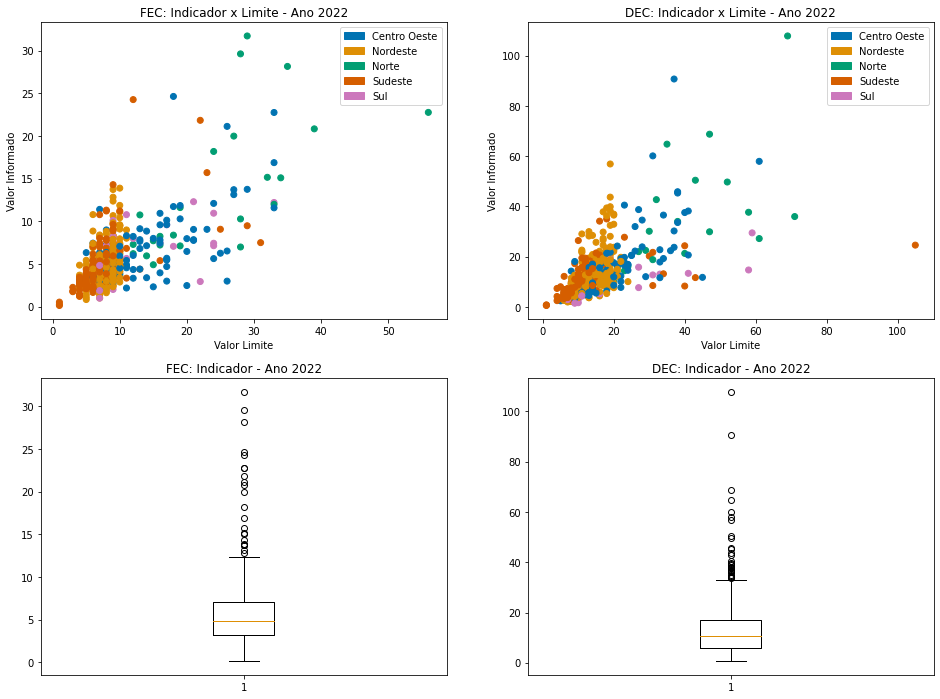

In [889]:
#MATPLOTLIB  (https://matplotlib.org/)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

#exibindo o sumário estatístico
df_sum = df_ind_w_local.groupby(['SigAgente','DscConjUndConsumidoras','SigIndicador','Municipio','Estado','Regiao',
                        'AnoIndice','VlrLimite'])[['VlrIndiceEnviado']].sum()
df_sum = df_sum.reset_index()


# configurando um grupo de subplots em um grid de 1 linha e 2 colunas
# e também o tamanho da figura
fig, ax = plt.subplots(2,2, figsize = (16, 12))

#selecionando um subconjunto de linhas e colunas
df_grafico1 = df_sum.loc[(df_sum['SigIndicador'] == 'FEC') & (df_sum['AnoIndice'] == 2022)].copy()

#selecionando um subconjunto de linhas e colunas
df_grafico2 = df_sum.loc[(df_sum['SigIndicador'] == 'DEC') & (df_sum['AnoIndice'] == 2022)].copy()

# criando um dicionário que mapeia cada Região a uma cor da pallete colorblind
sns.set_palette('colorblind')
cores = {'Centro Oeste': sns.color_palette()[0],'Nordeste':sns.color_palette()[1],
         'Norte':sns.color_palette()[2], 'Sudeste':sns.color_palette()[3],'Sul':sns.color_palette()[4]}

# criando uma nova coluna com as cores
df_grafico1.loc[:, 'Cor'] = df_grafico1['Regiao'].map(cores)
df_grafico2.loc[:, 'Cor'] = df_grafico2['Regiao'].map(cores)

# preparando a legenda
legenda = []
for regiao in cores:
    legenda.append(mpatches.Patch(color=cores[regiao], label=regiao))

####### SCATTER PLOT ##############################

#plotando o gráfico de Valor limite x Valor esperado para FEC

ax[0,0].scatter(df_grafico1["VlrLimite"],df_grafico1['VlrIndiceEnviado'], c=[cores[x] for x in df_grafico1['Regiao']],label='Gráfico 1')

#icluindo título e rótulo dos eixoos
ax[0,0].set_title('FEC: Indicador x Limite - Ano 2022')
ax[0,0].set_xlabel('Valor Limite')
ax[0,0].set_ylabel('Valor Informado')

ax[0,0].legend(handles=legenda)

# lotando o gráfico de Valor limite x Valor esperado para DEC
#ax[0,1].scatter(df_grafico2["VlrLimite"],df_grafico2['VlrIndiceEnviado'])

ax[0,1].scatter(df_grafico2["VlrLimite"],df_grafico2['VlrIndiceEnviado'], c=[cores[x] for x in df_grafico1['Regiao']],label='Gráfico 2')

#icluindo título e rótulo dos eixoos

ax[0,1].set_title("DEC: Indicador x Limite - Ano 2022")
ax[0,1].set_xlabel('Valor Limite')
ax[0,1].set_ylabel('Valor Informado');

ax[0,1].legend(handles=legenda)

####### BOX PLOT ##############################

#plotando o gráfico de Valor esperado para FEC
ax[1,0].boxplot(df_grafico1['VlrIndiceEnviado'])

#icluindo título e rótulo dos eixoos
ax[1,0].set_title('FEC: Indicador - Ano 2022')


#plotando o gráfico de Valor esperado para DEC
ax[1,1].boxplot(df_grafico2['VlrIndiceEnviado'])

#icluindo título e rótulo dos eixoos
ax[1,1].set_title('DEC: Indicador - Ano 2022');

# EXECUTAR LOCALMENTE
#plt.savefig('C:/Users/F8017266/OneDrive/PUC-RIO/MVP_SP1/Graficos/Analise_Disp1.svg',format='svg')
#plt.show()

plt.show()


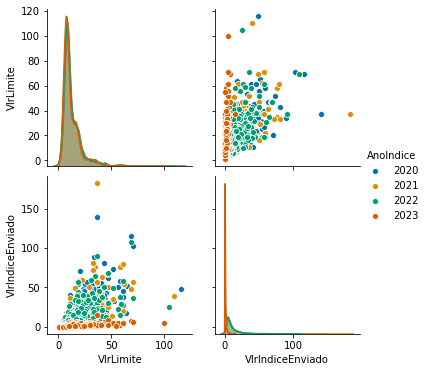

In [890]:
# importação do Seaborn
#import seaborn as sns

# pair plot 2 com Seaborn
sns.pairplot(df_sum, hue = "AnoIndice")

# EXECUTAR LOCALMENTE
#plt.savefig('C:/Users/F8017266/OneDrive/PUC-RIO/MVP_SP1/Graficos/Analise_Disp2.svg',format='svg')

plt.show();

### Resultado: 6 - Análise Gráfica de dispersão dos dados para o ano de 2022

Condirerações:

> 1. os dados foram agregados de forma a sumarizar anualmente os dados de FEC e DEC;
> 1. os dados foram filtrados para o ano de interesse 2022;
> 1. foram criadas bases separadas para os gráficos de DEC e FEC;

Essa Visão mostra que:

> 1. no grafico de dispersão é possivel observar que todas as medidas de DEC e FEC se concentram próximas aos eixos, que demonstra um comportamento dentro dos padrões esperados pelo regulador;
> 1. é possivel perceber uma linearidade entre o valor informado pelo operador e os limites, podendo inferir que existe uma relação entre os valores limites e o esforço  das operadoras em atingilos;
> 1. para as regiões Norte e Centro Oeste existe um descolamento dos valores limites e medidos em relação aos demais. Esse comportamento é esperado;
> 1. em menor número é percebido esse descolamento para as demais regiões;
> 1. os gráficos boxplot demonstram a existência de uma parte dos dados que podem representar outliers, cuja leitura pode ser complementada pelos gráficos de dispersão. Esse é um foco importante para esse trabalho, embora não seja o único;
> 1. O Gráfico 2 (dispersão) copia o Gráfico 1 com eixos invertidos. Claramente existe uma distorção em 2023 quando cruzados os valores enviados aser envestigado, contudo estará fora do escopo desse trabalho.

<center>Gráfico 1</center>

![Analise_Disp1.svg](https://raw.githubusercontent.com/wabastos/AnaliseExploratoria/main/Analise_Disp1.svg)

<center>Gráfico 2</center>

![Analise_Disp2.svg](https://raw.githubusercontent.com/wabastos/AnaliseExploratoria/main/Analise_Disp2.svg)



###  KPIs de Qualidade

Nessa etapa definimos cinco KPI que irão ajudar a selecionar quais são ou os casos críticos e que merecem atenção para tomada de decisão em uma empresa de Telecomunicações.

Critérios:

> 1. os dados foram agregados de forma a sumarizar anualmente os dados de FEC e DEC;


> __KPI_Outlier__ - esse KPI irá mostrar os casos em que o valor do FEC ou DEC se destacam negativamente em relação a sua própria média. Será gerada uma base de dados com a lista, dados de 2022, contendo as informações necessárias para localizar os pontos notáveis. Foi construída uma função para extrair o os Outliers;

> __KPI_1__ - indica a __*Qualidade Negativa*__ de FEC, ou seja, o valor informado pela operadora é maior que o limite máximo;

> __KPI_2__ - indica a __*Qualidade Negativa*__ de DEC, ou seja, o valor informado pela operadora é maior que o limite máximo;

> __KPI_3__ - indica a __*Qualidade positiva*__ de FEC, ou seja, o valor informado pela operadora é menor que a metade do limite máximo;

> __KPI_4__ - indica a __*Qualidade positiva*__ de DEC, ou seja, o valor informado pela operadora é menor que a metade do limite máximo;

Para ajudar na construção da análise foram criadas duas classes de  maneira a organizar o código em módulos reutilizáveis e abstrair a complexidade do código subjacente. São elas:

__class TabelaDinamica__ que permite manipular os dataframes atraves de agupamentos e suas pivotações
__class KpiQual__ utilizada para inserir e retornar no dataframe o cálculo de variação percentual entre colunas de dois dataframes 

Ações executadas:
> 1. criação das Classes e função;
> 1. obtenção da lista de Outliers;
> 1. criação e avaliação dos dataframes para os KPIs de 1 a 4;
> 1. análise dos KPIs de 1 a 4:
>> * por Região;
>> * por Estado e Município;
>> * por Operadora e Conjunto de Medição;
>> * por Município e Conjunto de Medição;



### Classes e Função

In [891]:
#*******************************   CLASSE TABELA DINÂMICA    ********************************************************
# A classe TabelaDinamica é uma classe personalizada que permite agrupar e fazer pivot de um dataframe do pandas. 
# A classe tem dois métodos: group_and_pivot e group. 
# .group_and_pivot - método que realiza o agrupamento e a pivot do dataframe.
# .group - método que realiza apenas o agrupamento. 
# A classe usa o operador *args para receber uma lista de parâmetros variáveis que são usados para realizar o agrupamento 
# e a pivot do dataframe. 
# O método group_and_pivot e o método group usam listas dos argumentos passados para realizar o agrupamento 
# e a pivot do dataframe. Eles também permitem que selecionar a operação de agrupamento e a operação de pivot usando os 
# parâmetros opcionais group_op e pivot_op. A classe também verifica se as entradas para group_op e pivot_op são válidas.
# Observar que os dois últimos parâmetros serão os operadores do group e pivot: o group será operado no último parâmetro 
# e o piviot operado no penultimo parâmetro

######### Código que deu demanda a Classe #####################################################################################
# Agrupa os dados do dataframe df_KPI_2 (DEC) por SigAgente, Estado e AnoIndice contando o número de ocorrências de cada grupo
## df = df_KPI_2.groupby(['SigAgente','Estado','AnoIndice'])['Municipio'].count().reset_index(name='count') 

#cria uma tabela dinâmica com os valores da coluna count e as colunas SigAgente, Estado e AnoIndice
## df= df.pivot_table(index=['SigAgente','Estado'], columns='AnoIndice', values='count', aggfunc='sum')
## df.fillna(0, inplace=True) # valores ausentes são preenchidos com 0 
## df['Total'] = df.sum(axis=1) # soma de cada linha é adicionada como uma nova coluna chamada ‘Total'
## df = df.sort_values('Total', ascending=False) # ordena decrescente pela coluna ‘Total’
## df = df.reset_index()

##print(df.to_markdown())

## cab = [dicionario['SigAgente'],dicionario['Estado']]
## cab.extend(['2020','2021','.2022'])

## print(tabulate(df, cab, tablefmt="pipe", numalign="left", stralign="left"))
###############################################################################################################################

class TabelaDinamica:
    def __init__(self, df, *args):
        self.df = df
        self.args = args

    def group_and_pivot(self, group_op='count', pivot_op='sum', unique_op=False):
        if group_op not in ['count', 'sum', 'mean']:
            raise ValueError('group_op must be count, sum or mean')
        if pivot_op not in ['count', 'sum', 'mean']:
            raise ValueError('pivot_op must be count, sum or mean')
        if unique_op:
            agg_func = pd.Series.nunique
        else:
            agg_func = group_op

        df_grouped = self.df.groupby(list(self.args[:-1]))[self.args[-1]].agg(agg_func).reset_index(name='count')
        df_pivoted = df_grouped.pivot_table(index=list(self.args[:-2]), columns=self.args[-2], values='count', aggfunc=pivot_op)
        df_pivoted.fillna(0, inplace=True)
        df_pivoted['Total'] = df_pivoted.sum(axis=1)
        df_pivoted = df_pivoted.sort_values('Total', ascending=False)

        return df_pivoted.reset_index()

    def group(self, group_op='count', unique_op=False):
        if group_op not in ['count', 'sum', 'mean']:
            raise ValueError('group_op must be count, sum or mean')
        if unique_op:
            agg_func = pd.Series.nunique
        else:
            agg_func = group_op

        return self.df.groupby(list(self.args[:-1]))[self.args[-1]].agg(agg_func).reset_index(name='count')
       

In [892]:
class KpiQual:
    def __init__(self, df_KPI, df0, group_cols):
        self.df_KPI = df_KPI
        self.df0 = df0
        self.group_cols = group_cols

    def run(self, text):
        
        # KPI
        df1 = TabelaDinamica(self.df_KPI, *self.group_cols).group_and_pivot('count')

        df1=pd.merge(df1,self.df0, on=[self.group_cols[0]], how='inner')
        df1['%Var'] = 100*df1['Total']/df1['count']

        print(text,'\n',df1.sort_values("%Var", ascending=False).to_markdown(),'\n')
        
        return df1

In [893]:
import pandas as pd

def get_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)]
    
    return outliers


### KPI_Outliers

In [894]:
df=df_sum.loc[(df_sum['AnoIndice'] == 2022)]
outliers = get_outliers(df, 'VlrIndiceEnviado')
print(outliers.sample(30).sort_values('VlrIndiceEnviado',ascending=False).to_markdown())
print(outliers.shape)

|      | SigAgente   | DscConjUndConsumidoras   | SigIndicador   | Municipio             | Estado   | Regiao       |   AnoIndice |   VlrLimite |   VlrIndiceEnviado |
|-----:|:------------|:-------------------------|:---------------|:----------------------|:---------|:-------------|------------:|------------:|-------------------:|
| 1010 | CERON       | TRIUNFO                  | DEC            | CANDEIAS DO JAMARI    | RO       | Norte        |        2022 |          35 |              64.79 |
| 1442 | COELBA      | ITANAGRA                 | DEC            | ITANAGRA              | BA       | Nordeste     |        2022 |          19 |              56.9  |
|   58 | CEA         | SANTANA                  | DEC            | SANTANA               | AP       | Norte        |        2022 |          52 |              49.72 |
| 3210 | EMT         | GUARANTA                 | DEC            | GUARANTA DO NORTE     | MT       | Centro Oeste |        2022 |          38 |              45.33 |
|   

### Resultado: 7 - KPI_Outliers

Essa Visão mostra que:

> 1. existe uma lista de medições que pode representar um ponto de atenção para as empresas de Telecom no dimensionamento e manutenção dos seus sistemas de backups;
> 1. uma amostra da lista sugere que as regiões Norte, Centro Oeste e Nordeste;
> 1. foram levantadas 65 ocorrências de outliers para o ano de 2022.

|      | SigAgente   | DscConjUndConsumidoras   | SigIndicador   | Municipio       | Estado   | Regiao       |   AnoIndice |   VlrLimite |   VlrIndiceEnviado |
|-----:|:------------|:-------------------------|:---------------|:----------------|:---------|:-------------|------------:|------------:|-------------------:|
|   66 | CEA         | TARTARUGALZINHO          | DEC            | TARTARUGALZINHO | AP       | Norte        |        2022 |          69 |             107.84 |
| 3322 | EMT         | RONDOLANDIA              | DEC            | RONDOLANDIA     | MT       | Centro Oeste |        2022 |          37 |              90.71 |
|  970 | CERON       | EXTREMA                  | DEC            | PORTO VELHO     | RO       | Norte        |        2022 |          47 |              68.75 |
| 3058 | EMS         | MIMOSO                   | DEC            | CAMPO GRANDE    | MS       | Centro Oeste |        2022 |          61 |              57.95 |
| 1442 | COELBA      | ITANAGRA                 | DEC            | ITANAGRA        | BA       | Nordeste     |        2022 |          19 |              56.9  |
|   58 | CEA         | SANTANA                  | DEC            | SANTANA         | AP       | Norte        |        2022 |          52 |              49.72 |
|  586 | CELPE       | PARNAMIRIM               | DEC            | PARNAMIRIM      | PE       | Nordeste     |        2022 |          19 |              43.71 |
|   50 | CEA         | PORTUARIA                | DEC            | MACAPA          | AP       | Norte        |        2022 |          32 |              42.71 |
| 3932 | ETO         | DUERE                    | DEC            | DUERE           | TO       | Centro Oeste |        2022 |          23 |              40.53 |
| 1306 | COELBA      | GANDU                    | DEC            | GANDU           | BA       | Nordeste     |        2022 |          19 |              39.89 |
| 1410 | COELBA      | ITABEROE                 | DEC            | ITUBERA         | BA       | Nordeste     |        2022 |          18 |              39.41 |
|  938 | CERON       | BURITIS                  | DEC            | BURITIS         | RO       | Norte        |        2022 |          58 |              37.69 |
| 3266 | EMT         | MATUPA                   | DEC            | MATUPA          | MT       | Centro Oeste |        2022 |          40 |              37.57 |
| 1170 | COELBA      | BETANIA                  | DEC            | SANTA LUZIA     | BA       | Nordeste     |        2022 |          18 |              36.28 |
| 2810 | ELETROPAULO | JUQUITIBA                | DEC            | JUQUITIBA       | SP       | Sudeste      |        2022 |          16 |              34.15 |
|  978 | CERON       | GUAJARA                  | DEC            | GUAJARA-MIRIM   | RO       | Norte        |        2022 |          38 |              34.04 |
| 3274 | EMT         | NOBRES                   | DEC            | NOBRES          | MT       | Centro Oeste |        2022 |          38 |              33.6  |
|  766 | CELPE       | TRINDADE                 | DEC            | TRINDADE        | PE       | Nordeste     |        2022 |          20 |              32.92 |
| 3528 | EPB         | MATARACA                 | DEC            | MATARACA        | PB       | Nordeste     |        2022 |          19 |              32.48 |
|   70 | CEA         | TARTARUGALZINHO          | FEC            | TARTARUGALZINHO | AP       | Norte        |        2022 |          29 |              31.72 |
| 3106 | EMT         | ARIPUANA                 | DEC            | ARIPUANA        | MT       | Centro Oeste |        2022 |          37 |              30.25 |
| 1258 | COELBA      | CONDE                    | DEC            | CONDE           | BA       | Nordeste     |        2022 |          17 |              29.81 |
|   54 | CEA         | PORTUARIA                | FEC            | MACAPA          | AP       | Norte        |        2022 |          35 |              28.15 |
|  650 | CELPE       | QUIPAPA                  | DEC            | QUIPAPA         | PE       | Nordeste     |        2022 |          19 |              28.11 |
|  330 | CELPE       | CORRENTES                | DEC            | CORRENTES       | PE       | Nordeste     |        2022 |          17 |              27.3  |
| 1626 | COELBA      | MUTUIPE                  | DEC            | MUTUIPE         | BA       | Nordeste     |        2022 |          17 |              26.61 |
| 2730 | ELETROPAULO | CAUCAIA                  | DEC            | COTIA           | SP       | Sudeste      |        2022 |          10 |              26.43 |
| 3956 | ETO         | ITAGUATINS               | DEC            | ITAGUATINS      | TO       | Centro Oeste |        2022 |          21 |              24.25 |
| 1546 | COELBA      | MACURURE                 | DEC            | MACURURE        | BA       | Nordeste     |        2022 |          20 |              23.75 |
|  174 | CELPE       | ANGELIM                  | DEC            | ANGELIM         | PE       | Nordeste     |        2022 |          18 |              23.35 |

__Shape da Visão__: (65, 9)

### Criação de Dataframes para obtenção dos KPI de 1 a 4

In [895]:
# Agrupa o df principal através de sumarização anual do atributo VlrIndiceEnviado - ou Medido 
df_sum = df_ind_w_local.groupby(['SigAgente','DscConjUndConsumidoras','SigIndicador','Municipio','Estado','Regiao',
                        'AnoIndice','VlrLimite'])[['VlrIndiceEnviado']].sum()
df_sum = df_sum.reset_index()
print('Quantidade de atributos do Dataframe sumarizado: ',df_sum.shape[0],'\n')

print('Quantidade distinta:\n',df_sum.nunique().to_markdown(),'\n')


#Gerando o KPI_1 -> Qualidade Negativa de FEC, ou seja, valor informado é maior que o limite máximo
df_KPI_1 = df_sum.loc[(df_sum['VlrIndiceEnviado'] > df_sum['VlrLimite']) & (df_sum['SigIndicador'] == 'FEC')]
print('Quantidade de atributos do KPI_1 - Qualidade Negativa de FEC: ',df_KPI_1.shape[0])


#Gerando o KPI_2 -> Qualidade Negativoade DEC, valor informado é maior que o limite máximo
df_KPI_2 = df_sum.loc[(df_sum['VlrIndiceEnviado'] > df_sum['VlrLimite']) & (df_sum['SigIndicador'] == 'DEC')]
print('Quantidade de atributos do KPI_2 - Desvio Negativa de DEC: ',df_KPI_2.shape[0])


#Gerando o KPI_3 -> Qualidade positiva de FEC, valor informado é menor que a metade do limite máximo
df_KPI_3 = df_sum.loc[(df_sum['VlrIndiceEnviado'] < df_sum['VlrLimite']/2) & (df_sum['SigIndicador'] == 'FEC')]
print('Quantidade de atributos do KPI_3 - Qualidade positiva de FEC: ',df_KPI_3.shape[0])


#Gerando o KPI_4 -> Qualidade positiva de DEC, valor informado é menor que a metade do limite máximo
df_KPI_4 = df_sum.loc[(df_sum['VlrIndiceEnviado'] < df_sum['VlrLimite']/2) & (df_sum['SigIndicador'] == 'DEC')]
print('Quantidade de atributos do KPI_4 - Qualidade positiva de DEC: ',df_KPI_4.shape[0])

Quantidade de atributos do Dataframe sumarizado:  4248 

Quantidade distinta:
 |                        |    0 |
|:-----------------------|-----:|
| SigAgente              |   59 |
| DscConjUndConsumidoras |  517 |
| SigIndicador           |    2 |
| Municipio              |  430 |
| Estado                 |   21 |
| Regiao                 |    5 |
| AnoIndice              |    4 |
| VlrLimite              |   62 |
| VlrIndiceEnviado       | 2461 | 

Quantidade de atributos do KPI_1 - Qualidade Negativa de FEC:  176
Quantidade de atributos do KPI_2 - Desvio Negativa de DEC:  504
Quantidade de atributos do KPI_3 - Qualidade positiva de FEC:  1071
Quantidade de atributos do KPI_4 - Qualidade positiva de DEC:  751


### Resultado: 8 - KPI_Outliers

Essa Visão mostra que:

> * Quantidade de atributos do Dataframe sumarizado:  4248 
> * Quantidade de atributos do KPI_1 - Qualidade Negativa de FEC:  176
> * Quantidade de atributos do KPI_2 - Desvio Negativa de DEC:  504
> * Quantidade de atributos do KPI_3 - Qualidade positiva de FEC:  1071
> * Quantidade de atributos do KPI_4 - Qualidade positiva de DEC:  751



<center>Quantidade distinta:<center/>

 |          Atributo     |   Único |
|:-----------------------|-----:|
| SigAgente              |   59 |
| DscConjUndConsumidoras |  517 |
| SigIndicador           |    2 |
| Municipio              |  430 |
| Estado                 |   21 |
| Regiao                 |    5 |
| AnoIndice              |    4 |
| VlrLimite              |   62 |
| VlrIndiceEnviado       | 2461 | 




### Análise dos KPI's por Região

Análise 1: de KPIs de qualidade de energia anual listando a quantidade de municipios por região: 

Quantidade de Municípios com Conjunto de Medição por região:
 |    | Regiao       |   count |
|---:|:-------------|--------:|
|  0 | Centro Oeste |      71 |
|  1 | Nordeste     |     197 |
|  2 | Norte        |      18 |
|  3 | Sudeste      |     121 |
|  4 | Sul          |      25 | 

KPI_1 -> Qualidade Negativa de FEC:
 
 |    | Regiao       |   2020 |   2021 |   2022 |   Total |   count |    %Var |
|---:|:-------------|-------:|-------:|-------:|--------:|--------:|--------:|
|  1 | Sudeste      |     24 |     22 |     13 |      59 |     121 | 48.7603 |
|  3 | Norte        |      4 |      2 |      2 |       8 |      18 | 44.4444 |
|  0 | Nordeste     |     35 |     26 |     23 |      84 |     197 | 42.6396 |
|  2 | Centro Oeste |      7 |      8 |      5 |      20 |      71 | 28.169  |
|  4 | Sul          |      1 |      3 |      1 |       5 |      25 | 20      | 

KPI_2 -> Qualidade 

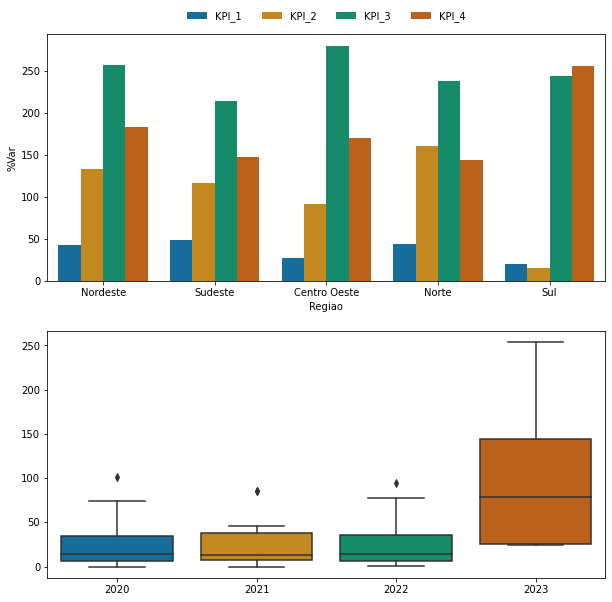

In [896]:
print('Análise 1: de KPIs de qualidade de energia anual listando a quantidade de municipios por região: \n' )

# Cria o Dataframe que sumariza quantidade de muniípios por Região. 
# Será usado como denominador para calcular a variação relativa dos KPIs
df0 = TabelaDinamica(df_sum,'Regiao','Municipio')  # monta o df sumarizado Município por Região
df0 = df0.group(group_op='count', unique_op=True)  # Contabiliza o municipio apenas uma vez

print('Quantidade de Municípios com Conjunto de Medição por região:\n',
      df0.to_markdown(),'\n')

lista = ['Regiao', 'AnoIndice','Municipio']

# KPI_1
df = KpiQual(df_KPI_1,df0,lista)  # Calcula a variação relativa do KPI
df1 = df.run('KPI_1 -> Qualidade Negativa de FEC:\n')

# KPI_2
df = KpiQual(df_KPI_2,df0,lista) # Calcula a variação relativa do KPI
df2 = df.run('KPI_2 -> Qualidade Negativoade DEC:\n')

# KPI_3
df = KpiQual(df_KPI_3,df0,lista) # Calcula a variação relativa do KPI
df3 = df.run('KPI_3 -> Qualidade positiva de FEC:\n')

# KPI_4
df = KpiQual(df_KPI_4,df0,lista) # Calcula a variação relativa do KPI
df4 = df.run('KPI_4 -> Qualidade positiva de DEC:\n')

# Agrupa os dataframes para plotagem única
df = pd.concat([df1.assign(dataset='KPI_1'),
                df2.assign(dataset='KPI_2'),
                df3.assign(dataset='KPI_3'),
                df4.assign(dataset='KPI_4')])

fig, ax = plt.subplots(nrows=2, figsize=(10,10))

sns.barplot(x='Regiao', y='%Var', hue='dataset', data=df, palette='colorblind', ax=ax[0])
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=4,borderaxespad=1, labelspacing=1.0, frameon=False)

sns.boxplot(data=df[[2020, 2021, 2022, 2023]], ax=ax[1])

# EXECUTAR LOCALMENTE
#plt.savefig('C:/Users/F8017266/OneDrive/PUC-RIO/MVP_SP1/Graficos/Analise_1.svg',format='svg')
#plt.show()

plt.show()




### Resultado: 9 - Análise dos KPI's por Região

Essa Visão mostra que:

> 1. para o KPI_1 o Sudeste é relativamente a região com a maior frequência de quedas de energia que superam o limite. Aqui pode ter uma explicação plausível que é a maior quantidade de subestações (conjuntos de medição) e causas prováveis de interrupção. A região Norte apesar de um valor absoluto baixo, em valor relaívo se equipara ao Sudeste. A região Nordeste possui o maior número absoluto fora da meta e um valor relativo próximo as regiões Norte e Sudeste;
> 1. para o KPI_2 apenas a ordem das regiçoes que mudam, mas a análise é semelhante ao KPI_1;
> 1. os dados por região ajudam a entender que as regiões Nordeste e Sudeste requerem ateção pela densidade alta e a região Norte pela ausência de recursos;
> 1. os gráficos de barra ajuda a visualizar a análise acima e o boxplot mostra que houve pouca variação nos dados dos KPI ao longo dos últimos três anos;  
> 1. Para uma empresa de Telecomunicações essa é uma informação que pode ajudar em suas decisões de investimento.

<center>Quantidade de Municípios com Conjunto de Medição por região:<center/>

 |    | Regiao       |   count |
|---:|:-------------|--------:|
|  0 | Centro Oeste |      71 |
|  1 | Nordeste     |     197 |
|  2 | Norte        |      18 |
|  3 | Sudeste      |     121 |
|  4 | Sul          |      25 |  

<br>
<center>KPI_1 -> Qualidade Negativa de FEC:<center/>
 
 |    | Regiao       |   2020 |   2021 |   2022 |   Total |   count |    %Var |
|---:|:-------------|-------:|-------:|-------:|--------:|--------:|--------:|
|  1 | Sudeste      |     24 |     22 |     13 |      59 |     121 | 48.7603 |
|  3 | Norte        |      4 |      2 |      2 |       8 |      18 | 44.4444 |
|  0 | Nordeste     |     35 |     26 |     23 |      84 |     197 | 42.6396 |
|  2 | Centro Oeste |      7 |      8 |      5 |      20 |      71 | 28.169  |
|  4 | Sul          |      1 |      3 |      1 |       5 |      25 | 20      |   

<br>
<center>KPI_2 -> Qualidade Negativoade DEC:<center/>
 
 |    | Regiao       |   2020 |   2021 |   2022 |   Total |   count |     %Var |
|---:|:-------------|-------:|-------:|-------:|--------:|--------:|---------:|
|  3 | Norte        |     15 |      8 |      6 |      29 |      18 | 161.111  |
|  0 | Nordeste     |    101 |     86 |     77 |     264 |     197 | 134.01   |
|  1 | Sudeste      |     54 |     44 |     44 |     142 |     121 | 117.355  |
|  2 | Centro Oeste |     22 |     24 |     19 |      65 |      71 |  91.5493 |
|  4 | Sul          |      1 |      0 |      3 |       4 |      25 |  16      |  

<br>
<center>KPI_3 -> Qualidade positiva de FEC:<center/>
 
 |    | Regiao       |   2020 |   2021 |   2022 |   2023 |   Total |   count |    %Var |
|---:|:-------------|-------:|-------:|-------:|-------:|--------:|--------:|--------:|
|  2 | Centro Oeste |     45 |     36 |     39 |     79 |     199 |      71 | 280.282 |
|  0 | Nordeste     |     74 |     86 |     94 |    254 |     508 |     197 | 257.868 |
|  3 | Sul          |     11 |     12 |     12 |     26 |      61 |      25 | 244     |
|  4 | Norte        |      1 |      6 |     12 |     24 |      43 |      18 | 238.889 |
|  1 | Sudeste      |     35 |     42 |     39 |    144 |     260 |     121 | 214.876 |   

<br>
<center>KPI_4 -> Qualidade positiva de DEC:<center/>
 
 |    | Regiao       |   2020 |   2021 |   2022 |   2023 |   Total |   count |    %Var |
|---:|:-------------|-------:|-------:|-------:|-------:|--------:|--------:|--------:|
|  3 | Sul          |     11 |     12 |     16 |     25 |      64 |      25 | 256     |
|  0 | Nordeste     |     27 |     46 |     35 |    253 |     361 |     197 | 183.249 |
|  2 | Centro Oeste |     14 |     12 |     16 |     79 |     121 |      71 | 170.423 |
|  1 | Sudeste      |     12 |     14 |      9 |    144 |     179 |     121 | 147.934 |
|  4 | Norte        |      0 |      1 |      1 |     24 |      26 |      18 | 144.444 |   


![Analise_1.svg](https://raw.githubusercontent.com/wabastos/AnaliseExploratoria/main/Analise_1.svg)

### Análise dos KPI's por Estado e Município

Análise 2 - de KPIs de qualidade de energia anual listando a quantidade de municipios por Estado: 

Quantidade de Municípios com Conjunto de Medição por região:
 |    | Estado   |   count |
|---:|:---------|--------:|
|  0 | AC       |       1 |
|  1 | AM       |       1 |
|  2 | AP       |       5 |
|  3 | BA       |      82 |
|  4 | DF       |       1 |
|  5 | ES       |       1 |
|  6 | GO       |       2 |
|  7 | MG       |      14 |
|  8 | MS       |      14 |
|  9 | MT       |      32 |
| 10 | PB       |      28 |
| 11 | PE       |      62 |
| 12 | PR       |       2 |
| 13 | RJ       |      10 |
| 14 | RN       |      20 |
| 15 | RO       |      11 |
| 16 | RS       |       7 |
| 17 | SC       |      16 |
| 18 | SE       |      10 |
| 19 | SP       |      96 |
| 20 | TO       |      22 | 

KPI_1 -> Qualidade Negativa de FEC:
 
 |    | Estado   |   2020 |   2021 |   2022 |   Total |   count |       %Var |
|---:|:---------|-------:|-------:|-------:|--------:|--------:|-----------

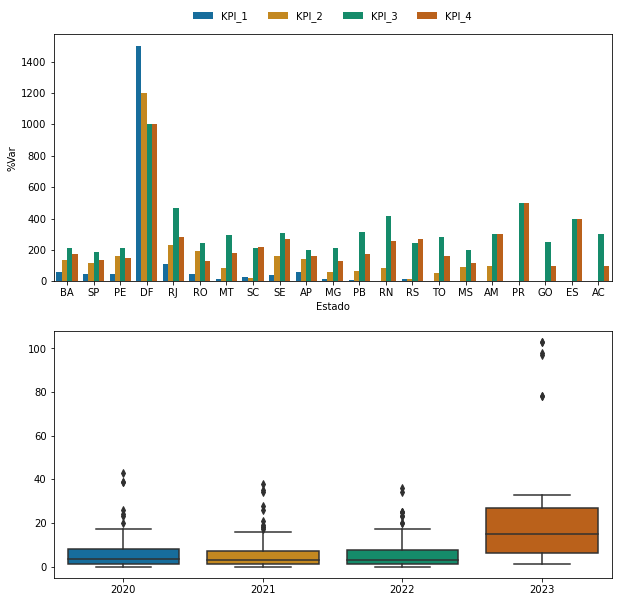

In [897]:
print('Análise 2 - de KPIs de qualidade de energia anual listando a quantidade de municipios por Estado: \n' )

# Cria o Dataframe que sumariza quantidade de muniípios por Região. 
# Será usado como denominador para calcular a variação relativa dos KPIs
df0 = TabelaDinamica(df_sum,'Estado','Municipio')
df0 = df0.group(group_op='count', unique_op=True)

print('Quantidade de Municípios com Conjunto de Medição por região:\n',
      df0.to_markdown(),'\n')

lista = ['Estado', 'AnoIndice','Municipio']

# KPI_1
df = KpiQual(df_KPI_1,df0,lista)
df1 = df.run('KPI_1 -> Qualidade Negativa de FEC:\n')

# KPI_2
df = KpiQual(df_KPI_2,df0,lista)
df2 = df.run('KPI_2 -> Qualidade Negativoade DEC:\n')

# KPI_3
df = KpiQual(df_KPI_3,df0,lista)
df3 = df.run('KPI_3 -> Qualidade positiva de FEC:\n')

# KPI_4
df = KpiQual(df_KPI_4,df0,lista)
df4 = df.run('KPI_4 -> Qualidade positiva de DEC:\n')

# Agrupa os dataframes para plotagem única
df = pd.concat([df1.assign(dataset='KPI_1'),
                df2.assign(dataset='KPI_2'),
                df3.assign(dataset='KPI_3'),
                df4.assign(dataset='KPI_4')])

fig, ax = plt.subplots(nrows=2, figsize=(10,10))

sns.barplot(x='Estado', y='%Var', hue='dataset', data=df, palette='colorblind', ax=ax[0])
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=4,borderaxespad=1, labelspacing=1.0, frameon=False)

sns.boxplot(data=df[[2020, 2021, 2022,2023]], ax=ax[1])

# EXECUTAR LOCALMENTE

#plt.gcf().set_size_inches(16, 14)

#plt.savefig('C:/Users/F8017266/OneDrive/PUC-RIO/MVP_SP1/Graficos/Analise_2.svg',format='svg')

plt.show()

### Resultado: 10 - Análise dos KPI's por Estado e Município

Essa Visão mostra que:

> 1. o DF deve ser desconsiderada nessa análise porque é um estado e uma cidade em um só tempo;
> 1. nessa análise podemos verificar a quantidade de municípios por estado em cada KPI;
> 1. o Estado do Rio de Janeiro, na amostra exibida, possui a maior quantidade de municípios relativos par os KPI 1 e 2, embora as quantidades absolutas não sejam as maiores. Em valores absolutos o estado de São Paulo e Bahia possuem maiores valores absolutos e valores ralitivos também.

<center>Quantidade de Municípios com Conjunto de Medição por região:<center/>

 |    | Estado   |   count |
|---:|:---------|--------:|
|  0 | AC       |       1 |
|  1 | AM       |       1 |
|  2 | AP       |       5 |
|  3 | BA       |      82 |
|  4 | DF       |       1 |
|  5 | ES       |       1 |
|  6 | GO       |       2 |
|  7 | MG       |      14 |
|  8 | MS       |      14 |
|  9 | MT       |      32 |
| 10 | PB       |      28 |
| 11 | PE       |      62 |
| 12 | PR       |       2 |
| 13 | RJ       |      10 |
| 14 | RN       |      20 |
| 15 | RO       |      11 |
| 16 | RS       |       7 |
| 17 | SC       |      16 |
| 18 | SE       |      10 |
| 19 | SP       |      96 |
| 20 | TO       |      22 | 

<br>
<center>KPI_1 -> Qualidade Negativa de FEC:<center/>
 
 |    | Estado   |   2020 |   2021 |   2022 |   Total |   count |       %Var |
|---:|:---------|-------:|-------:|-------:|--------:|--------:|-----------:|
|  3 | DF       |      5 |      6 |      4 |      15 |       1 | 1500       |
|  4 | RJ       |      6 |      3 |      2 |      11 |      10 |  110       |
|  0 | BA       |     20 |     13 |     17 |      50 |      82 |   60.9756  |
|  9 | AP       |      1 |      0 |      2 |       3 |       5 |   60       |
|  1 | SP       |     17 |     19 |     10 |      46 |      96 |   47.9167  |
|  5 | RO       |      3 |      2 |      0 |       5 |      11 |   45.4545  |
|  2 | PE       |     12 |     11 |      4 |      27 |      62 |   43.5484  |
|  8 | SE       |      1 |      2 |      1 |       4 |      10 |   40       |
|  7 | SC       |      1 |      2 |      1 |       4 |      16 |   25       |
| 10 | MG       |      1 |      0 |      1 |       2 |      14 |   14.2857  |
| 13 | RS       |      0 |      1 |      0 |       1 |       7 |   14.2857  |
|  6 | MT       |      1 |      2 |      1 |       4 |      32 |   12.5     |
| 11 | PB       |      2 |      0 |      0 |       2 |      28 |    7.14286 |
| 12 | RN       |      0 |      0 |      1 |       1 |      20 |    5       |
| 14 | TO       |      1 |      0 |      0 |       1 |      22 |    4.54545 | 

<br>
<center>KPI_2 -> Qualidade Negativoade DEC:<center/>
 
 |    | Estado   |   2020 |   2021 |   2022 |   Total |   count |      %Var |
|---:|:---------|-------:|-------:|-------:|--------:|--------:|----------:|
| 11 | DF       |      4 |      5 |      3 |      12 |       1 | 1200      |
|  4 | RJ       |     10 |      7 |      6 |      23 |      10 |  230      |
|  5 | RO       |     11 |      7 |      3 |      21 |      11 |  190.909  |
|  8 | SE       |      6 |      5 |      5 |      16 |      10 |  160      |
|  2 | PE       |     39 |     35 |     25 |      99 |      62 |  159.677  |
| 13 | AP       |      4 |      0 |      3 |       7 |       5 |  140      |
|  0 | BA       |     39 |     38 |     36 |     113 |      82 |  137.805  |
|  1 | SP       |     43 |     34 |     34 |     111 |      96 |  115.625  |
| 16 | AM       |      0 |      1 |      0 |       1 |       1 |  100      |
|  9 | MS       |      4 |      5 |      4 |      13 |      14 |   92.8571 |
|  3 | MT       |      8 |     12 |      8 |      28 |      32 |   87.5    |
|  7 | RN       |      7 |      4 |      6 |      17 |      20 |   85      |
|  6 | PB       |     10 |      4 |      5 |      19 |      28 |   67.8571 |
| 12 | MG       |      1 |      3 |      4 |       8 |      14 |   57.1429 |
| 10 | TO       |      6 |      2 |      4 |      12 |      22 |   54.5455 |
| 14 | SC       |      1 |      0 |      2 |       3 |      16 |   18.75   |
| 15 | RS       |      0 |      0 |      1 |       1 |       7 |   14.2857 | 

<br>
<center>KPI_3 -> Qualidade positiva de FEC:<center/>
 
 |    | Estado   |   2020 |   2021 |   2022 |   2023 |   Total |   count |     %Var |
|---:|:---------|-------:|-------:|-------:|-------:|--------:|--------:|---------:|
| 15 | DF       |      2 |      0 |      0 |      8 |      10 |       1 | 1000     |
| 14 | PR       |      1 |      3 |      3 |      3 |      10 |       2 |  500     |
|  7 | RJ       |      6 |      7 |      9 |     25 |      47 |      10 |  470     |
|  5 | RN       |     15 |     21 |     20 |     27 |      83 |      20 |  415     |
| 18 | ES       |      1 |      1 |      1 |      1 |       4 |       1 |  400     |
|  4 | PB       |     14 |     18 |     23 |     33 |      88 |      28 |  314.286 |
|  9 | SE       |      5 |      5 |      3 |     18 |      31 |      10 |  310     |
| 20 | AC       |      0 |      1 |      1 |      1 |       3 |       1 |  300     |
| 19 | AM       |      0 |      0 |      0 |      3 |       3 |       1 |  300     |
|  3 | MT       |     24 |     17 |     20 |     33 |      94 |      32 |  293.75  |
|  6 | TO       |     12 |     14 |     14 |     22 |      62 |      22 |  281.818 |
| 17 | GO       |      1 |      1 |      1 |      2 |       5 |       2 |  250     |
| 12 | RO       |      0 |      3 |     10 |     14 |      27 |      11 |  245.455 |
| 13 | RS       |      4 |      3 |      3 |      7 |      17 |       7 |  242.857 |
|  2 | PE       |     14 |     16 |     25 |     78 |     133 |      62 |  214.516 |
| 10 | MG       |      5 |      6 |      4 |     15 |      30 |      14 |  214.286 |
|  8 | SC       |      6 |      6 |      6 |     16 |      34 |      16 |  212.5   |
|  1 | BA       |     26 |     26 |     23 |     98 |     173 |      82 |  210.976 |
| 16 | AP       |      1 |      2 |      1 |      6 |      10 |       5 |  200     |
| 11 | MS       |      6 |      4 |      4 |     14 |      28 |      14 |  200     |
|  0 | SP       |     23 |     28 |     25 |    103 |     179 |      96 |  186.458 | 

<br>
<center>KPI_4 -> Qualidade positiva de DEC:<center/>
 
 |    | Estado   |   2020 |   2021 |   2022 |   2023 |   Total |   count |     %Var |
|---:|:---------|-------:|-------:|-------:|-------:|--------:|--------:|---------:|
| 15 | DF       |      1 |      0 |      1 |      8 |      10 |       1 | 1000     |
| 14 | PR       |      1 |      3 |      3 |      3 |      10 |       2 |  500     |
| 17 | ES       |      1 |      1 |      1 |      1 |       4 |       1 |  400     |
| 18 | AM       |      0 |      0 |      0 |      3 |       3 |       1 |  300     |
|  8 | RJ       |      2 |      1 |      0 |     25 |      28 |      10 |  280     |
| 10 | RS       |      4 |      3 |      5 |      7 |      19 |       7 |  271.429 |
|  9 | SE       |      3 |      4 |      2 |     18 |      27 |      10 |  270     |
|  4 | RN       |      8 |     11 |      5 |     27 |      51 |      20 |  255     |
|  7 | SC       |      6 |      6 |      8 |     15 |      35 |      16 |  218.75  |
|  3 | MT       |     10 |      5 |      9 |     33 |      57 |      32 |  178.125 |
|  5 | PB       |      3 |      7 |      6 |     33 |      49 |      28 |  175     |
|  0 | BA       |     12 |     18 |     14 |     97 |     141 |      82 |  171.951 |
|  6 | TO       |      3 |      6 |      5 |     22 |      36 |      22 |  163.636 |
| 16 | AP       |      0 |      1 |      1 |      6 |       8 |       5 |  160     |
|  2 | PE       |      1 |      6 |      8 |     78 |      93 |      62 |  150     |
|  1 | SP       |      8 |     11 |      7 |    103 |     129 |      96 |  134.375 |
| 11 | MG       |      1 |      1 |      1 |     15 |      18 |      14 |  128.571 |
| 13 | RO       |      0 |      0 |      0 |     14 |      14 |      11 |  127.273 |
| 12 | MS       |      0 |      1 |      1 |     14 |      16 |      14 |  114.286 |
| 19 | GO       |      0 |      0 |      0 |      2 |       2 |       2 |  100     |
| 20 | AC       |      0 |      0 |      0 |      1 |       1 |       1 |  100     | 

![Analise_2.svg](https://raw.githubusercontent.com/wabastos/AnaliseExploratoria/main/Analise_2.svg)

### Análise dos KPI's por Operador e Conjunto de Medição

Análise 3 - de KPIs de qualidade de energia anual listando a quantidade de Conjuntos por Opradora: 

Quantidade de Municípios com Conjunto de Medição por região:
 |    | SigAgente   |   count |
|---:|:------------|--------:|
|  0 | AME         |       3 |
|  1 | CEA         |       6 |
|  2 | CEBDIS      |       8 |
|  3 | CEDRAP      |       1 |
|  4 | CEDRI       |       1 |
|  5 | CEJAMA      |       1 |
|  6 | CELPE       |      82 |
|  7 | CERBRANORTE |       1 |
|  8 | CERCOS      |       1 |
|  9 | CEREJ       |       1 |
| 10 | CERES       |       1 |
| 11 | CERGAL      |       1 |
| 12 | CERGAPA     |       1 |
| 13 | CERGRAL     |       1 |
| 14 | CERILUZ     |       1 |
| 15 | CERIM       |       1 |
| 16 | CERIPA      |       1 |
| 17 | CERIS       |       1 |
| 18 | CERMC       |       1 |
| 19 | CERMOFUL    |       1 |
| 20 | CERNHE      |       1 |
| 21 | CERON       |      14 |
| 22 | CERPALO     |       1 |
| 23 | CERPRO      |       1 |
| 24 | CERRP       |       1 |


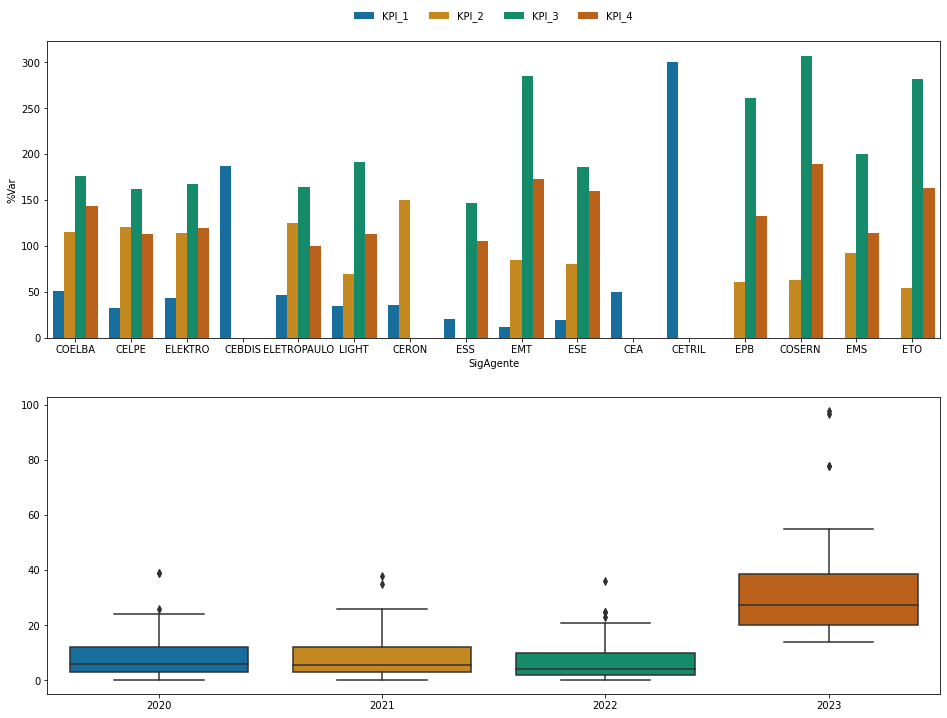

In [898]:
print('Análise 3 - de KPIs de qualidade de energia anual listando a quantidade de Conjuntos por Opradora: \n' )

df0 = TabelaDinamica(df_sum,'SigAgente','DscConjUndConsumidoras')
df0 = df0.group(group_op='count', unique_op=True)

print('Quantidade de Municípios com Conjunto de Medição por região:\n',
      df0.to_markdown(),'\n')

lista = ['SigAgente', 'AnoIndice','DscConjUndConsumidoras']

# KPI_1
df = KpiQual(df_KPI_1,df0,lista)
df1 = df.run('KPI_1 -> Qualidade Negativa de FEC:\n').head(12)

# KPI_2
df = KpiQual(df_KPI_2,df0,lista)
df2 = df.run('KPI_2 -> Qualidade Negativoade DEC:\n').head(12)

# KPI_3
df = KpiQual(df_KPI_3,df0,lista)
df3 = df.run('KPI_3 -> Qualidade positiva de FEC:\n').head(12)

# KPI_4
df = KpiQual(df_KPI_4,df0,lista)
df4 = df.run('KPI_4 -> Qualidade positiva de DEC:\n').head(12)

df = pd.concat([df1.assign(dataset='KPI_1'),
                df2.assign(dataset='KPI_2'),
                df3.assign(dataset='KPI_3'),
                df4.assign(dataset='KPI_4')])

fig, ax = plt.subplots(nrows=2, figsize=(10,10))

sns.barplot(x='SigAgente', y='%Var', hue='dataset', data=df, palette='colorblind', ax=ax[0])
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=4,borderaxespad=1, labelspacing=1.0, frameon=False)

sns.boxplot(data=df[[2020, 2021, 2022, 2023]], ax=ax[1])

plt.gcf().set_size_inches(16, 12)

# EXECUTAR LOCALMENTE
#plt.savefig('C:/Users/F8017266/OneDrive/PUC-RIO/MVP_SP1/Graficos/Analise_3.svg',format='svg')

plt.show()


### Resultado: 11 - Análise dos KPI's por Operador e Conjunto de Medição

Essa Visão mostra que:

> 1. para efeito de análise devemos desconsiderar as operadoras com apenas um conjunto de medição;
> 1. quando considerando Operador e Conjunto é relevante observar, principalmente, as operadoras com maior número de conjuntos como EletroPaulo, Coelba, Celpe e Light;
> 1. essa Visão não se mostra relevante para o planejamento técnico de uma empresa de Telecomunicações, contudo pode ser útil para a sua operação e relacionamento com a distribuidora;

<center>Quantidade de Municípios com Conjunto de Medição por região:<center/>

 |    | SigAgente   |   count |
|---:|:------------|--------:|
|  0 | AME         |       3 |
|  1 | CEA         |       6 |
|  2 | CEBDIS      |       8 |
|  3 | CEDRAP      |       1 |
|  4 | CEDRI       |       1 |
|  5 | CEJAMA      |       1 |
|  6 | CELPE       |      82 |
|  7 | CERBRANORTE |       1 |
|  8 | CERCOS      |       1 |
|  9 | CEREJ       |       1 |
| 10 | CERES       |       1 |
| 11 | CERGAL      |       1 |
| 12 | CERGAPA     |       1 |
| 13 | CERGRAL     |       1 |
| 14 | CERILUZ     |       1 |
| 15 | CERIM       |       1 |
| 16 | CERIPA      |       1 |
| 17 | CERIS       |       1 |
| 18 | CERMC       |       1 |
| 19 | CERMOFUL    |       1 |
| 20 | CERNHE      |       1 |
| 21 | CERON       |      14 |
| 22 | CERPALO     |       1 |
| 23 | CERPRO      |       1 |
| 24 | CERRP       |       1 |
| 25 | CERSUL      |       1 |
| 26 | CERTREL     |       1 |
| 27 | CETRIL      |       1 |
| 28 | CHESP       |       2 |
| 29 | COELBA      |      98 |
| 30 | COOPERCOCAL |       1 |
| 31 | COOPERLUZ   |       1 |
| 32 | COOPERMILA  |       1 |
| 33 | COORSEL     |       1 |
| 34 | COPREL      |       2 |
| 35 | COSERN      |      27 |
| 36 | CRERAL      |       1 |
| 37 | DCELT       |       1 |
| 38 | DMED        |       2 |
| 39 | EBO         |       2 |
| 40 | EFLJC       |       1 |
| 41 | EFLUL       |       1 |
| 42 | ELEKTRO     |      55 |
| 43 | ELETROACRE  |       1 |
| 44 | ELETROCAR   |       2 |
| 45 | ELETROPAULO |      28 |
| 46 | ELFSM       |       1 |
| 47 | EMG         |      11 |
| 48 | EMS         |      14 |
| 49 | EMT         |      33 |
| 50 | ENF         |       1 |
| 51 | EPB         |      31 |
| 52 | ESE         |      15 |
| 53 | ESS         |      19 |
| 54 | ETO         |      22 |
| 55 | HIDROPAN    |       1 |
| 56 | LIGHT       |      23 |
| 57 | MUXENERGIA  |       1 |
| 58 | SULGIPE     |       2 | 

<br>
<center>KPI_1 -> Qualidade Negativa de FEC:<center/>
 
|    | SigAgente   |   2020 |   2021 |   2022 |   Total |   count |      %Var |
|---:|:------------|-------:|-------:|-------:|--------:|--------:|----------:|
|  3 | CEBDIS      |      5 |      6 |      4 |      15 |       8 | 187.5     |
|  0 | COELBA      |     20 |     13 |     17 |      50 |      98 |  51.0204  |
| 10 | CEA         |      1 |      0 |      2 |       3 |       6 |  50       |
| 16 | DMED        |      0 |      0 |      1 |       1 |       2 |  50       |
|  4 | ELETROPAULO |      5 |      5 |      3 |      13 |      28 |  46.4286  |
|  2 | ELEKTRO     |      9 |      9 |      6 |      24 |      55 |  43.6364  |
|  6 | CERON       |      3 |      2 |      0 |       5 |      14 |  35.7143  |
|  5 | LIGHT       |      5 |      2 |      1 |       8 |      23 |  34.7826  |
|  1 | CELPE       |     12 |     11 |      4 |      27 |      82 |  32.9268  |
|  7 | ESS         |      1 |      3 |      0 |       4 |      19 |  21.0526  |
|  9 | ESE         |      1 |      1 |      1 |       3 |      15 |  20       |
|  8 | EMT         |      1 |      2 |      1 |       4 |      33 |  12.1212  |
| 19 | EMG         |      1 |      0 |      0 |       1 |      11 |   9.09091 |
| 14 | EPB         |      2 |      0 |      0 |       2 |      31 |   6.45161 |
| 22 | ETO         |      1 |      0 |      0 |       1 |      22 |   4.54545 |
| 15 | COSERN      |      0 |      0 |      1 |       1 |      27 |   3.7037  | 

<br>
<center>KPI_2 -> Qualidade Negativoade DEC:
 
|    | SigAgente   |   2020 |   2021 |   2022 |   Total |   count |     %Var |
|---:|:------------|-------:|-------:|-------:|--------:|--------:|---------:|
| 12 | CEBDIS      |      4 |      5 |      3 |      12 |       8 | 150      |
|  5 | CERON       |     11 |      7 |      3 |      21 |      14 | 150      |
|  3 | ELETROPAULO |     14 |     11 |     10 |      35 |      28 | 125      |
|  1 | CELPE       |     39 |     35 |     25 |      99 |      82 | 120.732  |
| 14 | CEA         |      4 |      0 |      3 |       7 |       6 | 116.667  |
|  0 | COELBA      |     39 |     38 |     36 |     113 |      98 | 115.306  |
|  2 | ELEKTRO     |     24 |     18 |     21 |      63 |      55 | 114.545  |
| 26 | CEJAMA      |      0 |      0 |      1 |       1 |       1 | 100      |
| 25 | CERGAL      |      1 |      0 |      0 |       1 |       1 | 100      |
| 24 | COORSEL     |      0 |      0 |      1 |       1 |       1 | 100      |
| 22 | ENF         |      0 |      1 |      0 |       1 |       1 | 100      |
|  9 | EMS         |      4 |      5 |      4 |      13 |      14 |  92.8571 |
|  4 | EMT         |      8 |     12 |      8 |      28 |      33 |  84.8485 |
| 11 | ESE         |      4 |      4 |      4 |      12 |      15 |  80      |
|  8 | LIGHT       |      8 |      4 |      4 |      16 |      23 |  69.5652 |
|  7 | COSERN      |      7 |      4 |      6 |      17 |      27 |  62.963  |
|  6 | EPB         |     10 |      4 |      5 |      19 |      31 |  61.2903 |
| 13 | ESS         |      2 |      5 |      4 |      11 |      19 |  57.8947 |
| 10 | ETO         |      6 |      2 |      4 |      12 |      22 |  54.5455 |
| 23 | ELETROCAR   |      0 |      0 |      1 |       1 |       2 |  50      |
| 27 | SULGIPE     |      1 |      0 |      0 |       1 |       2 |  50      |
| 15 | EMG         |      2 |      1 |      2 |       5 |      11 |  45.4545 |
| 21 | AME         |      0 |      1 |      0 |       1 |       3 |  33.3333 | 

<br>
<center>KPI_3 -> Qualidade positiva de FEC:<center/>
 
|    | SigAgente   |   2020 |   2021 |   2022 |   2023 |   Total |   count |    %Var |
|---:|:------------|-------:|-------:|-------:|-------:|--------:|--------:|--------:|
| 28 | COOPERCOCAL |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 27 | MUXENERGIA  |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 26 | CERGAPA     |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 25 | CERILUZ     |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 24 | COOPERLUZ   |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 23 | CERMOFUL    |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 22 | CERNHE      |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 21 | ELFSM       |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 20 | EFLJC       |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 16 | COPREL      |      1 |      2 |      2 |      2 |       7 |       2 | 350     |
| 17 | EBO         |      2 |      1 |      2 |      2 |       7 |       2 | 350     |
|  4 | COSERN      |     15 |     21 |     20 |     27 |      83 |      27 | 307.407 |
| 32 | CEDRI       |      0 |      1 |      1 |      1 |       3 |       1 | 300     |
| 34 | CERBRANORTE |      0 |      1 |      1 |      1 |       3 |       1 | 300     |
| 29 | ELETROACRE  |      0 |      1 |      1 |      1 |       3 |       1 | 300     |
| 33 | CERIM       |      0 |      1 |      1 |      1 |       3 |       1 | 300     |
|  2 | EMT         |     24 |     17 |     20 |     33 |      94 |      33 | 284.848 |
|  6 | ETO         |     12 |     14 |     14 |     22 |      62 |      22 | 281.818 |
|  5 | EPB         |     12 |     17 |     21 |     31 |      81 |      31 | 261.29  |
| 18 | CHESP       |      1 |      1 |      1 |      2 |       5 |       2 | 250     |
| 13 | EMG         |      5 |      4 |      4 |     11 |      24 |      11 | 218.182 |
| 40 | EFLUL       |      0 |      1 |      0 |      1 |       2 |       1 | 200     |
| 36 | CERIS       |      0 |      0 |      1 |      1 |       2 |       1 | 200     |
| 41 | CERPALO     |      1 |      0 |      0 |      1 |       2 |       1 | 200     |
| 37 | CERTREL     |      0 |      0 |      1 |      1 |       2 |       1 | 200     |
| 38 | CERSUL      |      1 |      0 |      0 |      1 |       2 |       1 | 200     |
| 11 | EMS         |      6 |      4 |      4 |     14 |      28 |      14 | 200     |
| 19 | DMED        |      0 |      2 |      0 |      2 |       4 |       2 | 200     |
| 39 | CERRP       |      0 |      0 |      1 |      1 |       2 |       1 | 200     |
| 12 | CERON       |      0 |      3 |     10 |     14 |      27 |      14 | 192.857 |
|  8 | LIGHT       |      6 |      7 |      8 |     23 |      44 |      23 | 191.304 |
| 10 | ESE         |      5 |      5 |      3 |     15 |      28 |      15 | 186.667 |
|  0 | COELBA      |     26 |     26 |     23 |     98 |     173 |      98 | 176.531 |
|  3 | ELEKTRO     |     11 |     16 |     10 |     55 |      92 |      55 | 167.273 |
| 14 | CEA         |      1 |      2 |      1 |      6 |      10 |       6 | 166.667 |
|  7 | ELETROPAULO |      4 |      7 |      7 |     28 |      46 |      28 | 164.286 |
|  1 | CELPE       |     14 |     16 |     25 |     78 |     133 |      82 | 162.195 |
| 30 | ELETROCAR   |      1 |      0 |      0 |      2 |       3 |       2 | 150     |
|  9 | ESS         |      7 |      3 |      4 |     14 |      28 |      19 | 147.368 |
| 15 | CEBDIS      |      2 |      0 |      0 |      8 |      10 |       8 | 125     |
| 31 | AME         |      0 |      0 |      0 |      3 |       3 |       3 | 100     |
| 50 | CERGAL      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 57 | CETRIL      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 56 | CRERAL      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 55 | DCELT       |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 54 | CERPRO      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 53 | CERMC       |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 52 | COORSEL     |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 51 | CERGRAL     |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 46 | HIDROPAN    |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 49 | COOPERMILA  |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 48 | ENF         |      0 |      0 |      1 |      0 |       1 |       1 | 100     |
| 47 | CEDRAP      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 45 | CERES       |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 44 | CEJAMA      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 43 | CERCOS      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 42 | CEREJ       |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 35 | SULGIPE     |      0 |      0 |      0 |      2 |       2 |       2 | 100     |
| 58 | CERIPA      |      0 |      0 |      0 |      1 |       1 |       1 | 100     | 

<br>
<center>KPI_4 -> Qualidade positiva de DEC:<center/>
 
 |    | SigAgente   |   2020 |   2021 |   2022 |   2023 |   Total |   count |    %Var |
|---:|:------------|-------:|-------:|-------:|-------:|--------:|--------:|--------:|
| 15 | EBO         |      2 |      2 |      2 |      2 |       8 |       2 | 400     |
| 26 | CERGAPA     |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 25 | CERILUZ     |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 24 | COOPERLUZ   |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 23 | EFLJC       |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 22 | MUXENERGIA  |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 21 | CEDRI       |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 20 | CERMOFUL    |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 19 | ELFSM       |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 18 | CERIS       |      1 |      1 |      1 |      1 |       4 |       1 | 400     |
| 17 | COPREL      |      1 |      2 |      2 |      2 |       7 |       2 | 350     |
| 29 | EFLUL       |      1 |      1 |      0 |      1 |       3 |       1 | 300     |
| 31 | CERBRANORTE |      0 |      1 |      1 |      1 |       3 |       1 | 300     |
| 32 | CERIM       |      0 |      1 |      1 |      1 |       3 |       1 | 300     |
| 33 | CERIPA      |      1 |      0 |      1 |      1 |       3 |       1 | 300     |
| 27 | HIDROPAN    |      1 |      0 |      1 |      1 |       3 |       1 | 300     |
| 34 | CERPALO     |      1 |      0 |      0 |      1 |       2 |       1 | 200     |
| 35 | CERSUL      |      1 |      0 |      0 |      1 |       2 |       1 | 200     |
| 36 | CEREJ       |      0 |      0 |      1 |      1 |       2 |       1 | 200     |
| 37 | CERGRAL     |      0 |      1 |      0 |      1 |       2 |       1 | 200     |
| 38 | COOPERMILA  |      0 |      0 |      1 |      1 |       2 |       1 | 200     |
| 39 | CERRP       |      0 |      0 |      1 |      1 |       2 |       1 | 200     |
| 41 | CERTREL     |      0 |      0 |      1 |      1 |       2 |       1 | 200     |
|  4 | COSERN      |      8 |     11 |      5 |     27 |      51 |      27 | 188.889 |
|  3 | EMT         |     10 |      5 |      9 |     33 |      57 |      33 | 172.727 |
|  6 | ETO         |      3 |      6 |      5 |     22 |      36 |      22 | 163.636 |
|  9 | ESE         |      3 |      4 |      2 |     15 |      24 |      15 | 160     |
| 28 | ELETROCAR   |      0 |      0 |      1 |      2 |       3 |       2 | 150     |
|  0 | COELBA      |     12 |     18 |     14 |     97 |     141 |      98 | 143.878 |
| 16 | CEA         |      0 |      1 |      1 |      6 |       8 |       6 | 133.333 |
|  5 | EPB         |      1 |      5 |      4 |     31 |      41 |      31 | 132.258 |
| 13 | EMG         |      1 |      1 |      1 |     11 |      14 |      11 | 127.273 |
| 14 | CEBDIS      |      1 |      0 |      1 |      8 |      10 |       8 | 125     |
|  2 | ELEKTRO     |      3 |      6 |      2 |     55 |      66 |      55 | 120     |
| 11 | EMS         |      0 |      1 |      1 |     14 |      16 |      14 | 114.286 |
|  1 | CELPE       |      1 |      6 |      8 |     78 |      93 |      82 | 113.415 |
|  8 | LIGHT       |      2 |      1 |      0 |     23 |      26 |      23 | 113.043 |
| 10 | ESS         |      2 |      3 |      1 |     14 |      20 |      19 | 105.263 |
| 53 | DCELT       |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 50 | CETRIL      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 51 | CERPRO      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 52 | CRERAL      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 55 | CERNHE      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 54 | CERMC       |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 48 | CERCOS      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 56 | ELETROACRE  |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 49 | CERES       |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 43 | CHESP       |      0 |      0 |      0 |      2 |       2 |       2 | 100     |
| 47 | COORSEL     |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 46 | CEJAMA      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 45 | CEDRAP      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 44 | CERGAL      |      0 |      0 |      0 |      1 |       1 |       1 | 100     |
| 30 | AME         |      0 |      0 |      0 |      3 |       3 |       3 | 100     |
| 42 | DMED        |      0 |      0 |      0 |      2 |       2 |       2 | 100     |
| 40 | SULGIPE     |      0 |      0 |      0 |      2 |       2 |       2 | 100     |
|  7 | ELETROPAULO |      0 |      0 |      0 |     28 |      28 |      28 | 100     |
| 12 | CERON       |      0 |      0 |      0 |     14 |      14 |      14 | 100     |
| 57 | COOPERCOCAL |      0 |      0 |      1 |      0 |       1 |       1 | 100     | 

![Analise_3.svg](https://raw.githubusercontent.com/wabastos/AnaliseExploratoria/main/Analise_3.svg)


### Análise dos KPI's por Município e Conjunto de Medição

Análise 4 - de KPIs de qualidade de energia anual listando a quantidade de Municípios por Operadora: 

Quantidade de Municípios com Conjunto de Medição por região:
 |     | Municipio               |   count |
|----:|:------------------------|--------:|
|   0 | ACARI                   |       1 |
|   1 | ADAMANTINA              |       1 |
|   2 | ADOLFO                  |       1 |
|   3 | AFRANIO                 |       1 |
|   4 | AGRESTINA               |       1 |
|   5 | AGUAI                   |       1 |
|   6 | ALAGOINHAS              |       1 |
|   7 | ALCOBACA                |       1 |
|   8 | ALMAS                   |       1 |
|   9 | AMAMBAI                 |       1 |
|  10 | AMARGOSA                |       1 |
|  11 | ANAGE                   |       1 |
|  12 | ANANAS                  |       1 |
|  13 | ANDRADINA               |       1 |
|  14 | ANGATUBA                |       1 |
|  15 | ANGELIM                 |       1 |
|  16 | ANGICAL                 |       1 |

KPI_4 -> Qualidade positiva de DEC:
 
 |     | Municipio               |   2020 |   2021 |   2022 |   2023 |   Total |   count |     %Var |
|----:|:------------------------|-------:|-------:|-------:|-------:|--------:|--------:|---------:|
|  14 | TAPEJARA                |      1 |      1 |      1 |      1 |       4 |       1 | 400      |
|  29 | SAO LOURENCO DA SERRA   |      1 |      1 |      1 |      1 |       4 |       1 | 400      |
|  30 | JUINA                   |      1 |      1 |      1 |      1 |       4 |       1 | 400      |
|  25 | ITARIRI                 |      1 |      1 |      1 |      1 |       4 |       1 | 400      |
|  24 | COLATINA                |      1 |      1 |      1 |      1 |       4 |       1 | 400      |
|  23 | MORRO DA FUMACA         |      1 |      1 |      1 |      1 |       4 |       1 | 400      |
|  31 | PIUM                    |      1 |      1 |      1 |      1 |       4 |       1 | 400      |
|  32 | GRAO PARA               |      1 |      1 | 

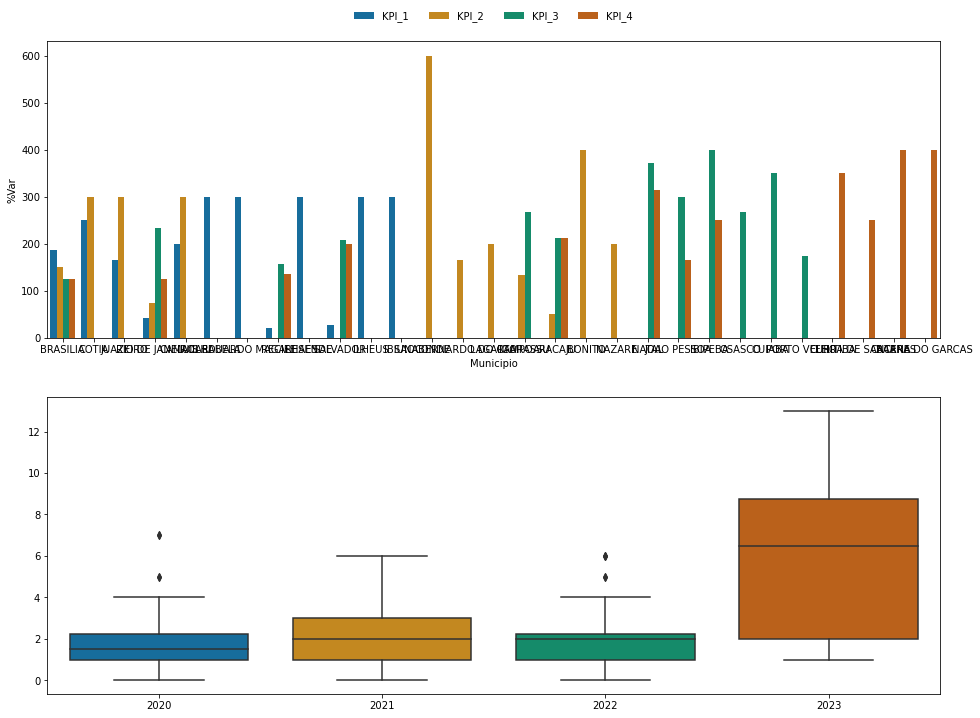

In [899]:
print('Análise 4 - de KPIs de qualidade de energia anual listando a quantidade de Municípios por Operadora: \n' )

df0 = TabelaDinamica(df_sum,'Municipio','DscConjUndConsumidoras')
df0 = df0.group(group_op='count', unique_op=True)

print('Quantidade de Municípios com Conjunto de Medição por região:\n',
      df0.to_markdown(),'\n')

lista = ['Municipio', 'AnoIndice','DscConjUndConsumidoras']

# KPI_1
df = KpiQual(df_KPI_1,df0,lista)
df1 = df.run('KPI_1 -> Qualidade Negativa de FEC:\n').head(12)

# KPI_2
df = KpiQual(df_KPI_2,df0,lista)
df2 = df.run('KPI_2 -> Qualidade Negativoade DEC:\n').head(12)

# KPI_3
df = KpiQual(df_KPI_3,df0,lista)
df3 = df.run('KPI_3 -> Qualidade positiva de FEC:\n').head(12)

# KPI_4
df = KpiQual(df_KPI_4,df0,lista)
df4 = df.run('KPI_4 -> Qualidade positiva de DEC:\n').head(12)

df = pd.concat([df1.assign(dataset='KPI_1'),
                df2.assign(dataset='KPI_2'),
                df3.assign(dataset='KPI_3'),
                df4.assign(dataset='KPI_4')])

fig, ax = plt.subplots(nrows=2, figsize=(10,10))

sns.barplot(x='Municipio', y='%Var', hue='dataset', data=df, palette='colorblind', ax=ax[0])
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=4,borderaxespad=1, labelspacing=1.0, frameon=False)

sns.boxplot(data=df[[2020, 2021, 2022, 2023]], ax=ax[1])

plt.gcf().set_size_inches(16, 12)

# EXECUTAR LOCALMENTE
#plt.savefig('C:/Users/F8017266/OneDrive/PUC-RIO/MVP_SP1/Graficos/Analise_4.svg',format='svg')

plt.show()


 |     | Municipio               |   count |
|----:|:------------------------|--------:|
|  20 | ARACAJU                 |       8 |
|  41 | BARRA MANSA             |       3 |
|  52 | BRASILIA                |       8 |
|  62 | CABO DE SANTO AGOSTINHO |       2 |
|  71 | CAMACARI                |       2 |
| 227 | JOAO PESSOA             |       6 |
| 281 | NATAL                   |       7 |
| 335 | RECIFE                  |      14 |
| 344 | RIO DE JANEIRO          |      12 |
| 355 | SALVADOR                |      11 |
 

KPI_1 -> Qualidade Negativa de FEC:
 
 |    | Municipio              |   2020 |   2021 |   2022 |   Total |   count |     %Var |
|---:|:-----------------------|-------:|-------:|-------:|--------:|--------:|---------:|
|  0 | BRASILIA               |      5 |      6 |      4 |      15 |       8 | 187.5    |
|  2 | JUAZEIRO               |      2 |      2 |      1 |       5 |       3 | 166.667  |
| 27 | PORTO VELHO            |      1 |      1 |      0 |       2 |       4 |  50      |
|  3 | RIO DE JANEIRO         |      2 |      2 |      1 |       5 |      12 |  41.6667 |
| 76 | BARRA MANSA            |      1 |      0 |      0 |       1 |       3 |  33.3333 |
| 71 | DIADEMA                |      1 |      0 |      0 |       1 |       3 |  33.3333 |
| 80 | IGARASSU               |      1 |      0 |      0 |       1 |       3 |  33.3333 |
| 58 | SAO BERNARDO DO CAMPO  |      1 |      0 |      0 |       1 |       3 |  33.3333 |
|  9 | SALVADOR               |      1 |      0 |      2 |       3 |      11 |  27.2727 |
|  7 | RECIFE                 |      0 |      3 |      0 |       3 |      14 |  21.4286 |
| 79 | ARACAJU                |      0 |      0 |      1 |       1 |       8 |  12.5    | 

KPI_2 -> Qualidade Negativoade DEC:
 
 |     | Municipio               |   2020 |   2021 |   2022 |   Total |   count |     %Var |
|----:|:------------------------|-------:|-------:|-------:|--------:|--------:|---------:|
|  11 | NAZARE                  |      1 |      2 |      1 |       4 |       2 | 200      |
|   6 | SAO BERNARDO DO CAMPO   |      3 |      1 |      1 |       5 |       3 | 166.667  |
|   0 | BRASILIA                |      4 |      5 |      3 |      12 |       8 | 150      |
|  65 | TIBAU                   |      2 |      0 |      1 |       3 |       2 | 150      |
|   2 | RIO DE JANEIRO          |      3 |      4 |      2 |       9 |      12 |  75      |
|  26 | PORTO VELHO             |      1 |      1 |      1 |       3 |       4 |  75      |
| 118 | BARRA MANSA             |      2 |      0 |      0 |       2 |       3 |  66.6667 |
| 167 | SAO JOAO DE MERITI      |      0 |      0 |      1 |       1 |       3 |  33.3333 |
| 224 | EMBU DAS ARTES          |      0 |      0 |      1 |       1 |       3 |  33.3333 |
| 192 | MANAUS                  |      0 |      1 |      0 |       1 |       3 |  33.3333 |
| 115 | SALVADOR                |      1 |      0 |      1 |       2 |      11 |  18.1818 |
| 109 | RECIFE                  |      0 |      2 |      0 |       2 |      14 |  14.2857 | 

KPI_3 -> Qualidade positiva de FEC:
 
 |     | Municipio               |   2020 |   2021 |   2022 |   2023 |   Total |   count |    %Var |
|----:|:------------------------|-------:|-------:|-------:|-------:|--------:|--------:|--------:|
|   1 | NATAL                   |      7 |      6 |      6 |      7 |      26 |       7 | 371.429 |
|   4 | JOAO PESSOA             |      1 |      5 |      6 |      6 |      18 |       6 | 300     |
|   9 | OSASCO                  |      1 |      2 |      2 |      3 |       8 |       3 | 266.667 |
|   8 | IGARASSU                |      1 |      1 |      3 |      3 |       8 |       3 | 266.667 |
|  17 | MACAPA                  |      1 |      1 |      1 |      2 |       5 |       2 | 250     |
|  19 | CABO DE SANTO AGOSTINHO |      1 |      0 |      2 |      2 |       5 |       2 | 250     |
|   0 | RIO DE JANEIRO          |      5 |      5 |      6 |     12 |      28 |      12 | 233.333 |
|   5 | ARACAJU                 |      4 |      4 |      1 |      8 |      17 |       8 | 212.5   |
|  11 | PORTO VELHO             |      0 |      1 |      2 |      4 |       7 |       4 | 175     |
|  18 | SAO BERNARDO DO CAMPO   |      0 |      2 |      0 |      3 |       5 |       3 | 166.667 |
|   3 | RECIFE                  |      1 |      4 |      4 |     13 |      22 |      14 | 157.143 |
| 140 | TIBAU                   |      0 |      1 |      0 |      2 |       3 |       2 | 150     |
|  65 | SAO JOAO DE MERITI      |      0 |      1 |      0 |      3 |       4 |       3 | 133.333 |
|   6 | BRASILIA                |      2 |      0 |      0 |      8 |      10 |       8 | 125     |


KPI_4 -> Qualidade positiva de DEC:
 
 |     | Municipio               |   2020 |   2021 |   2022 |   2023 |   Total |   count |     %Var |
|----:|:------------------------|-------:|-------:|-------:|-------:|--------:|--------:|---------:|
|   7 | CURITIBA                |      1 |      2 |      2 |      2 |       7 |       2 | 350      |
|   0 | NATAL                   |      7 |      5 |      3 |      7 |      22 |       7 | 314.286  |
|   3 | ARACAJU                 |      3 |      4 |      2 |      8 |      17 |       8 | 212.5    |
|   1 | SALVADOR                |      4 |      2 |      5 |     11 |      22 |      11 | 200      |
|   5 | JOAO PESSOA             |      0 |      2 |      2 |      6 |      10 |       6 | 166.667  |
|  57 | CABO DE SANTO AGOSTINHO |      0 |      0 |      1 |      2 |       3 |       2 | 150      |
|   2 | RECIFE                  |      0 |      1 |      5 |     13 |      19 |      14 | 135.714  |
|  22 | JABOATAO DOS GUARARAPES |      0 |      1 |      0 |      3 |       4 |       3 | 133.333  |
|   6 | BRASILIA                |      1 |      0 |      1 |      8 |      10 |       8 | 125      |
|   4 | RIO DE JANEIRO          |      2 |      1 |      0 |     12 |      15 |      12 | 125      |
| 107 | JUAZEIRO                |      0 |      0 |      0 |      2 |       2 |       3 |  66.6667 | 